### Import Packages

In [2]:
library(readxl)
library(stats)
library(data.table)
library(MASS)
library(moments)
library(car)
library(dplyr)

Loading required package: carData

Attaching package: ‘dplyr’

The following object is masked from ‘package:car’:

    recode

The following object is masked from ‘package:MASS’:

    select

The following objects are masked from ‘package:data.table’:

    between, first, last

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [3]:
library(olsrr)


Attaching package: ‘olsrr’

The following object is masked from ‘package:MASS’:

    cement

The following object is masked from ‘package:datasets’:

    rivers



### Import Data

In [4]:
advertising <- read_excel('./HW2_MultimediaHW.xlsx')

### Perform EDAs

In [4]:
head(advertising)

Months,Sales (units),ADV_Total,ADV_Offline,Catalogs_ExistCust,Catalogs_Winback,Catalogs_NewCust,Mailings,ADV_online,Banner,Search,SocialMedia,Newsletter,Retargeting,Portals
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,3444.523,661.3194,591.1781,503.9151,0.0000,87.26294,0.000000,70.14136,0,39.86268,0,26.886107,0,3.392569
2,3354.753,1249.0182,1198.6046,306.3622,314.6137,577.62865,0.000000,50.41357,0,38.16640,0,8.854604,0,3.392569
3,3979.682,1408.8378,1333.1326,1298.6937,0.0000,0.00000,34.438880,75.70517,0,38.16640,0,34.146204,0,3.392569
4,4816.464,1719.9289,1659.9652,323.9706,200.1860,1131.56606,4.242577,59.96365,0,38.16640,0,18.404685,0,3.392569
5,4294.312,671.2236,620.8101,620.8101,0.0000,0.00000,0.000000,50.41357,0,38.16640,0,8.854604,0,3.392569
6,4133.617,687.0274,617.5646,617.5646,0.0000,0.00000,0.000000,69.46284,0,38.16640,0,27.903877,0,3.392569


#### Lag the Sales by  1

Lag sales by 1 period as prescribed in the homework.

In [6]:
advertising$lag_sales <- shift(advertising$`Sales (units)`, n = 1)

In [7]:
colnames(advertising)

[1] "Months"             "Sales (units)"      "ADV_Total"         
 [4] "ADV_Offline"        "Catalogs_ExistCust" "Catalogs_Winback"  
 [7] "Catalogs_NewCust"   "Mailings"           "ADV_online"        
[10] "Banner"             "Search"             "SocialMedia"       
[13] "Newsletter"         "Retargeting"        "Portals"           
[16] "lag_sales"

In [11]:
mean(advertising$Search)

[1] 69.83262

#### Perform Normality Tests

Normality tests show that __all independent variables are not normally distributed__.

In [7]:
shapiro.test(advertising$Catalogs_ExistCust)


	Shapiro-Wilk normality test

data:  advertising$Catalogs_ExistCust
W = 0.92102, p-value = 0.006527


In [8]:
shapiro.test(advertising$Catalogs_Winback)


	Shapiro-Wilk normality test

data:  advertising$Catalogs_Winback
W = 0.70692, p-value = 7.61e-08


In [9]:
shapiro.test(advertising$Catalogs_NewCust)


	Shapiro-Wilk normality test

data:  advertising$Catalogs_NewCust
W = 0.78991, p-value = 2.718e-06


In [10]:
shapiro.test(advertising$Mailings)


	Shapiro-Wilk normality test

data:  advertising$Mailings
W = 0.6758, p-value = 2.343e-08


In [11]:
shapiro.test(advertising$Banner)


	Shapiro-Wilk normality test

data:  advertising$Banner
W = 0.30053, p-value = 6.91e-13


In [12]:
shapiro.test(advertising$Search)


	Shapiro-Wilk normality test

data:  advertising$Search
W = 0.93407, p-value = 0.01781


In [13]:
shapiro.test(advertising$Newsletter)


	Shapiro-Wilk normality test

data:  advertising$Newsletter
W = 0.89778, p-value = 0.001237


In [14]:
shapiro.test(advertising$Retargeting)


	Shapiro-Wilk normality test

data:  advertising$Retargeting
W = 0.7049, p-value = 7.034e-08


In [15]:
shapiro.test(advertising$Portals)


	Shapiro-Wilk normality test

data:  advertising$Portals
W = 0.8979, p-value = 0.001246


In [16]:
# skewness(subset_selection_3)

--offline
Catalogs_ExistCust

--online
Search
Newsletter

--Lag of Sales
lag_sales

Other possible variables

other_offline_ads = ADV_Offline - Catalogs_ExistCust


In [160]:
# advertising %>% describe

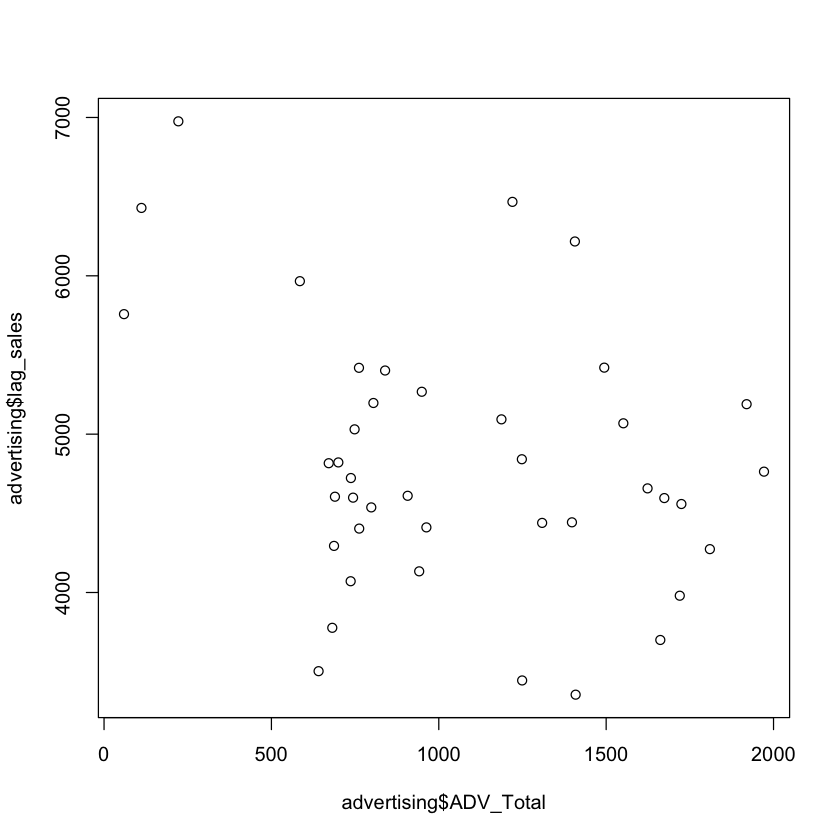

In [151]:
plot(advertising$ADV_Total, advertising$lag_sales)
abline(lm(advertising$lag_sales~advertising$ADV_Total))

In [154]:
summary(lm(advertising$`Sales (units)` ~ advertising$ADV_Total + advertising$lag_sales))


Call:
lm(formula = advertising$`Sales (units)` ~ advertising$ADV_Total + 
    advertising$lag_sales)

Residuals:
     Min       1Q   Median       3Q      Max 
-1704.88  -439.95     5.05   429.28  2016.08 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)   
(Intercept)           3123.7571   885.5827   3.527  0.00112 **
advertising$ADV_Total    0.1449     0.2632   0.551  0.58516   
advertising$lag_sales    0.3254     0.1559   2.087  0.04361 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 773.3 on 38 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.1031,	Adjusted R-squared:  0.05589 
F-statistic: 2.184 on 2 and 38 DF,  p-value: 0.1265


In [190]:
special_selection <- advertising %>% select('Sales (units)', 
                                    'lag_sales',
                                    'Newsletter', 
                                    'Search', 
                                    'Catalogs_ExistCust', 'ADV_Offline', 'ADV_online')

In [210]:
special_model <- lm(formula = `Sales (units)` ~ ., data=special_selection)

In [211]:
summary(special_model)


Call:
lm(formula = `Sales (units)` ~ ., data = special_selection)

Residuals:
     Min       1Q   Median       3Q      Max 
-1547.81  -505.53   -94.71   410.99  1767.67 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)   
(Intercept)        3075.31674  953.58387   3.225  0.00278 **
lag_sales             0.19576    0.18212   1.075  0.28999   
Newsletter            6.11231   16.16599   0.378  0.70771   
Search                9.58977   14.14398   0.678  0.50235   
Catalogs_ExistCust    0.05145    0.51650   0.100  0.92123   
ADV_Offline           0.02364    0.30279   0.078  0.93823   
ADV_online           -0.25462    6.52675  -0.039  0.96911   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 784.6 on 34 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.1739,	Adjusted R-squared:  0.02817 
F-statistic: 1.193 on 6 and 34 DF,  p-value: 0.3334


In [212]:
AIC(special_model)

[1] 671.2184

### Perform Modeling

#### Model 1 - 5 Vars

This model considers variables with at least 80% of the values filled. 

In [215]:
selection <- advertising %>% select('Sales (units)', 
                                    'lag_sales', 
#                                     'ADV_Offline',
                                    'Portals', 
                                    'Newsletter', 
                                    'Search', 
                                    'Catalogs_ExistCust')

In [67]:
selection <- as.data.frame(selection)
# subset_selection <- selection[2:nrow(selection),]

In [68]:
# selection$other_offline <- advertising$ADV_Offline - advertising$Catalogs_ExistCust

In [217]:
model_1 <- lm(formula = `Sales (units)` ~ ., data=selection)

In [218]:
summary(model_1)


Call:
lm(formula = `Sales (units)` ~ ., data = selection)

Residuals:
     Min       1Q   Median       3Q      Max 
-1135.96  -423.54    25.16   398.69  1583.22 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)        3385.55747  837.46683   4.043 0.000276 ***
lag_sales             0.12924    0.16759   0.771 0.445794    
Portals             255.14222  129.70355   1.967 0.057136 .  
Newsletter            3.39325   14.76966   0.230 0.819628    
Search               -7.57246    9.89241  -0.765 0.449116    
Catalogs_ExistCust   -0.08847    0.45308  -0.195 0.846321    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 733.9 on 35 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.256,	Adjusted R-squared:  0.1497 
F-statistic: 2.408 on 5 and 35 DF,  p-value: 0.05603


In [219]:
AIC(model_1)

[1] 664.9297

In [431]:
advertising

Months,Sales (units),ADV_Total,ADV_Offline,Catalogs_ExistCust,Catalogs_Winback,Catalogs_NewCust,Mailings,ADV_online,Banner,Search,SocialMedia,Newsletter,Retargeting,Portals,lag_sales
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,3444.523,661.31944,591.1781,503.9151,0.00000,87.26294,0.000000,70.14136,0.00000,39.86268,0,26.886107,0.000000,3.392569,NA
2,3354.753,1249.01816,1198.6046,306.3622,314.61375,577.62865,0.000000,50.41357,0.00000,38.16640,0,8.854604,0.000000,3.392569,3444.523
3,3979.682,1408.83775,1333.1326,1298.6937,0.00000,0.00000,34.438880,75.70517,0.00000,38.16640,0,34.146204,0.000000,3.392569,3354.753
4,4816.464,1719.92887,1659.9652,323.9706,200.18601,1131.56606,4.242577,59.96365,0.00000,38.16640,0,18.404685,0.000000,3.392569,3979.682
5,4294.312,671.22362,620.8101,620.8101,0.00000,0.00000,0.000000,50.41357,0.00000,38.16640,0,8.854604,0.000000,3.392569,4816.464
6,4133.617,687.02742,617.5646,617.5646,0.00000,0.00000,0.000000,69.46284,0.00000,38.16640,0,27.903877,0.000000,3.392569,4294.312
7,4821.475,941.43547,888.4775,304.3570,214.97005,369.15045,0.000000,52.95800,0.00000,40.71082,0,8.854604,0.000000,3.392569,4133.617
8,3503.131,699.94858,636.5924,617.3280,0.00000,0.00000,19.264328,63.35622,0.00000,41.55897,0,18.404685,0.000000,3.392569,4821.475
9,4657.559,640.91802,575.9164,556.2475,0.00000,0.00000,19.668892,65.00162,0.00000,43.25525,0,18.353796,0.000000,3.392569,3503.131


#### Model  2 - 9 Vars

This model considers all 9 advertising variables.

In [152]:
selection_2 <- advertising %>% select(-'ADV_Total', -'ADV_Offline', -'SocialMedia', -'ADV_online', -'Months')
subset_selection_2 <- selection_2[2:nrow(selection_2),]

In [153]:
model_2 <- lm(formula = `Sales (units)` ~ .-1 + 1, data = subset_selection_2)

In [154]:
summary(model_2)


Call:
lm(formula = `Sales (units)` ~ . - 1 + 1, data = subset_selection_2)

Residuals:
    Min      1Q  Median      3Q     Max 
-1235.5  -478.6   -35.0   313.2  1528.5 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)   
(Intercept)        3121.25888 1007.13611   3.099  0.00419 **
Catalogs_ExistCust   -0.07300    0.49007  -0.149  0.88258   
Catalogs_Winback      0.80968    1.31768   0.614  0.54354   
Catalogs_NewCust     -0.24775    0.45359  -0.546  0.58897   
Mailings             -0.53723    7.08780  -0.076  0.94008   
Banner                4.57065    7.78450   0.587  0.56150   
Search                3.73381   14.24858   0.262  0.79508   
Newsletter            0.27450   16.14229   0.017  0.98655   
Retargeting         -18.77204   14.43761  -1.300  0.20343   
Portals             232.80319  140.91035   1.652  0.10894   
lag_sales             0.09395    0.19634   0.478  0.63576   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standa

In [27]:
AIC(model_2)

[1] 671.2056

#### Model 3 - Square Root Transform of Ad Mediums from Model 1

In [295]:
selection_3 <- selection
# selection_3$dim_portals <- sqrt(selection_3$Portals)
selection_3$dim_newsletter <- sqrt(selection_3$Newsletter)
selection_3$dim_search <- sqrt(selection_3$Search)
selection_3$dim_catexistcust <- sqrt(selection_3$Catalogs_ExistCust)
# selection_3$dim_other_offline <- sqrt(selection_3$other_offline)

In [297]:
# selection_3

In [276]:
# subset_selection_3 <- selection_3[2:nrow(selection_3),]

In [300]:
model_3 <- lm(formula = `Sales (units)` ~ ., data = selection_3)

In [301]:
summary(model_3)


Call:
lm(formula = `Sales (units)` ~ ., data = selection_3)

Residuals:
     Min       1Q   Median       3Q      Max 
-1292.86  -311.07     7.29   393.89  1140.93 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)         203.7897  3278.1377   0.062    0.951    
lag_sales            -0.1897     0.1515  -1.252    0.219    
Newsletter          -67.3229    67.6416  -0.995    0.327    
Search              -57.4035    45.3119  -1.267    0.214    
Catalogs_ExistCust    4.6816     0.9408   4.976 1.98e-05 ***
dim_newsletter      637.7782   649.0028   0.983    0.333    
dim_search         1188.3076   770.6155   1.542    0.133    
dim_catexistcust   -192.9460    36.3837  -5.303 7.54e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 573.9 on 33 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.5711,	Adjusted R-squared:  0.4801 
F-statistic: 6.277 on 7 and 33 DF,  p-value:

In [302]:
AIC(model_3)

[1] 646.3475

##### Backward Stepwise Regression

In [303]:
# ols_step_forward_p(model_1)

In [306]:
stepAIC(model_3, direction = 'backward', trace = FALSE)


Call:
lm(formula = `Sales (units)` ~ lag_sales + Search + Catalogs_ExistCust + 
    dim_search + dim_catexistcust, data = selection_3)

Coefficients:
       (Intercept)           lag_sales              Search  Catalogs_ExistCust  
         1522.0062             -0.2124            -58.1452              4.7061  
        dim_search    dim_catexistcust  
         1223.6891           -193.4651  


##### Forward Stepwise Regression

In [307]:
stepAIC(model_3, direction = 'forward', trace = FALSE)


Call:
lm(formula = `Sales (units)` ~ lag_sales + Newsletter + Search + 
    Catalogs_ExistCust + dim_newsletter + dim_search + dim_catexistcust, 
    data = selection_3)

Coefficients:
       (Intercept)           lag_sales          Newsletter              Search  
          203.7897             -0.1897            -67.3229            -57.4035  
Catalogs_ExistCust      dim_newsletter          dim_search    dim_catexistcust  
            4.6816            637.7782           1188.3076           -192.9460  


####  Model 4 - Stepwise Regression, Backward Selection of Model 3 

In [317]:
model_4.1 <- lm(formula = `Sales (units)` ~ lag_sales + dim_newsletter + 
                dim_search + dim_catexistcust, data = selection_3)

In [318]:
summary(model_4.1)


Call:
lm(formula = `Sales (units)` ~ lag_sales + dim_newsletter + dim_search + 
    dim_catexistcust, data = selection_3)

Residuals:
    Min      1Q  Median      3Q     Max 
-1306.2  -450.4  -104.9   305.3  1993.8 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)   
(Intercept)      2998.53237 1057.39974   2.836  0.00746 **
lag_sales           0.05438    0.17783   0.306  0.76153   
dim_newsletter    148.82475  138.81752   1.072  0.29081   
dim_search        179.35084   88.06559   2.037  0.04910 * 
dim_catexistcust  -25.01658   17.44283  -1.434  0.16014   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 738.1 on 36 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.2259,	Adjusted R-squared:  0.1399 
F-statistic: 2.626 on 4 and 36 DF,  p-value: 0.05048


In [319]:
AIC(model_4.1)

[1] 664.5553

$$\frac{\beta}{(1-\lambda)\bar{A}}$$

In [334]:
head(selection_3)

,Sales (units),lag_sales,Newsletter,Search,Catalogs_ExistCust,dim_newsletter,dim_search,dim_catexistcust
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,3444.523,NA,26.886107,39.86268,503.9151,5.185181,6.313690,22.44805
2,3354.753,3444.523,8.854604,38.16640,306.3622,2.975669,6.177896,17.50321
3,3979.682,3354.753,34.146204,38.16640,1298.6937,5.843475,6.177896,36.03739
4,4816.464,3979.682,18.404685,38.16640,323.9706,4.290068,6.177896,17.99918
5,4294.312,4816.464,8.854604,38.16640,620.8101,2.975669,6.177896,24.91606
6,4133.617,4294.312,27.903877,38.16640,617.5646,5.282412,6.177896,24.85085


In [335]:
model_4.2 <- lm(formula = `Sales (units)` ~ lag_sales + Newsletter + 
                Search + dim_catexistcust, data = selection_3)

In [336]:
summary(model_4.2)


Call:
lm(formula = `Sales (units)` ~ lag_sales + Newsletter + Search + 
    dim_catexistcust, data = selection_3)

Residuals:
     Min       1Q   Median       3Q      Max 
-1293.28  -431.19   -62.19   301.60  2001.51 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)      4025.70786  980.11212   4.107  0.00022 ***
lag_sales           0.06733    0.17815   0.378  0.70771    
Newsletter         13.75639   14.62833   0.940  0.35328    
Search             10.55203    5.23376   2.016  0.05129 .  
dim_catexistcust  -23.77709   17.53983  -1.356  0.18367    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 744 on 36 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.2134,	Adjusted R-squared:  0.126 
F-statistic: 2.441 on 4 and 36 DF,  p-value: 0.06438


In [308]:
model_4 <- lm(formula = `Sales (units)` ~ lag_sales + Search + Catalogs_ExistCust + 
    dim_search + dim_catexistcust, data = selection_3)

In [309]:
summary(model_4)


Call:
lm(formula = `Sales (units)` ~ lag_sales + Search + Catalogs_ExistCust + 
    dim_search + dim_catexistcust, data = selection_3)

Residuals:
     Min       1Q   Median       3Q      Max 
-1310.14  -437.23    45.12   353.60  1131.57 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        1522.0062  2939.6592   0.518    0.608    
lag_sales            -0.2124     0.1476  -1.439    0.159    
Search              -58.1452    43.5593  -1.335    0.191    
Catalogs_ExistCust    4.7061     0.9020   5.217 8.31e-06 ***
dim_search         1223.6891   739.1078   1.656    0.107    
dim_catexistcust   -193.4651    35.7166  -5.417 4.54e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 565.5 on 35 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.5582,	Adjusted R-squared:  0.4951 
F-statistic: 8.844 on 5 and 35 DF,  p-value: 1.679e-05


In [310]:
AIC(model_4)

[1] 643.5604

In [311]:
model_4.5 <- lm(formula = `Sales (units)` ~ lag_sales + Catalogs_ExistCust + 
    dim_search + dim_catexistcust, data = selection_3)

In [312]:
summary(model_4.5)


Call:
lm(formula = `Sales (units)` ~ lag_sales + Catalogs_ExistCust + 
    dim_search + dim_catexistcust, data = selection_3)

Residuals:
     Min       1Q   Median       3Q      Max 
-1402.50  -394.58     5.32   340.63  1119.49 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        5276.4715   863.9951   6.107 5.00e-07 ***
lag_sales            -0.1639     0.1446  -1.133  0.26456    
Catalogs_ExistCust    4.6357     0.9102   5.093 1.13e-05 ***
dim_search          241.3147    69.0666   3.494  0.00128 ** 
dim_catexistcust   -190.2330    36.0193  -5.281 6.34e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 571.6 on 36 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.5357,	Adjusted R-squared:  0.4841 
F-statistic: 10.38 on 4 and 36 DF,  p-value: 1.07e-05


In [313]:
AIC(model_4.5)

[1] 643.5963

In [186]:
model_4.6 <- lm(formula = `Sales (units)` ~ lag_sales + Search + Catalogs_ExistCust + 
    dim_search , data = selection_3)

In [187]:
summary(model_4.6)


Call:
lm(formula = `Sales (units)` ~ lag_sales + Search + Catalogs_ExistCust + 
    dim_search, data = selection_3)

Residuals:
     Min       1Q   Median       3Q      Max 
-1585.19  -449.69   -76.41   400.04  1791.92 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)
(Intercept)        -227.4395  3906.1619  -0.058    0.954
lag_sales             0.1588     0.1748   0.908    0.370
Search              -42.1498    58.0993  -0.725    0.473
Catalogs_ExistCust    0.1308     0.4231   0.309    0.759
dim_search          871.4275   984.2615   0.885    0.382

Residual standard error: 756 on 36 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.1878,	Adjusted R-squared:  0.0976 
F-statistic: 2.082 on 4 and 36 DF,  p-value: 0.1035


In [188]:
AIC(model_4.6)

[1] 666.5228

In [314]:
model_4.7 <- lm(formula = `Sales (units)` ~ lag_sales + Catalogs_ExistCust + 
    dim_search , data = selection_3)

In [315]:
summary(model_4.7)


Call:
lm(formula = `Sales (units)` ~ lag_sales + Catalogs_ExistCust + 
    dim_search, data = selection_3)

Residuals:
     Min       1Q   Median       3Q      Max 
-1549.63  -535.38   -17.75   373.16  1775.08 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)   
(Intercept)        2528.0444   906.3222   2.789   0.0083 **
lag_sales             0.1896     0.1685   1.125   0.2678   
Catalogs_ExistCust    0.1352     0.4204   0.322   0.7496   
dim_search          160.2965    88.4931   1.811   0.0782 . 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 751.2 on 37 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.176,	Adjusted R-squared:  0.1092 
F-statistic: 2.634 on 3 and 37 DF,  p-value: 0.06419


In [316]:
AIC(model_4.7)

[1] 665.1179

#### Model 5 - Stepwise Regression, Forward Selection of Model 3

In [286]:
model_5 <- lm(formula = `Sales (units)` ~ (lag_sales + Newsletter + Search + 
    Catalogs_ExistCust + other_offline + dim_newsletter + dim_search + 
    dim_catexistcust + dim_other_offline) - 1 + 1, data = selection_3)

In [287]:
summary(model_5)


Call:
lm(formula = `Sales (units)` ~ (lag_sales + Newsletter + Search + 
    Catalogs_ExistCust + other_offline + dim_newsletter + dim_search + 
    dim_catexistcust + dim_other_offline) - 1 + 1, data = selection_3)

Residuals:
     Min       1Q   Median       3Q      Max 
-1275.46  -298.61    22.43   392.24  1055.82 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)         -32.6264  3408.9113  -0.010    0.992    
lag_sales            -0.1709     0.1554  -1.099    0.280    
Newsletter          -48.9251    71.7481  -0.682    0.500    
Search              -63.8720    47.2782  -1.351    0.186    
Catalogs_ExistCust    4.9903     1.0084   4.949 2.49e-05 ***
other_offline         0.9657     1.1095   0.870    0.391    
dim_newsletter      455.6331   690.5511   0.660    0.514    
dim_search         1305.3081   804.6661   1.622    0.115    
dim_catexistcust   -197.4838    37.5127  -5.264 1.01e-05 ***
dim_other_offline   -26.3111    34.6978  -0.758    0.4

In [288]:
AIC(model_5)

[1] 649.1094

#### Model 6 - Derived from Model 3 without Portals Channel

In [41]:
selection_6 <- selection_3
selection_6 <- selection_6 %>% select(-'Portals')
subset_selection_6 <- selection_6[2:nrow(selection_6),]

In [42]:
model_6 <- lm(formula = `Sales (units)` ~ .-1 + 1, data = subset_selection_6)

In [43]:
summary(model_6)


Call:
lm(formula = `Sales (units)` ~ . - 1 + 1, data = subset_selection_6)

Residuals:
     Min       1Q   Median       3Q      Max 
-1263.74  -397.54    73.31   316.42  1059.79 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -288.9185  3204.3581  -0.090    0.929    
lag_sales            -0.2090     0.1480  -1.413    0.167    
Newsletter          -76.8966    66.0879  -1.164    0.253    
Search              -60.9346    44.1565  -1.380    0.177    
Catalogs_ExistCust    4.3653     0.9349   4.669 5.18e-05 ***
dim_portals         800.8383   476.1943   1.682    0.102    
dim_newsletter      714.2029   633.3712   1.128    0.268    
dim_search         1049.0625   754.6723   1.390    0.174    
dim_catexistcust   -183.5239    35.8563  -5.118 1.41e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 558.6 on 32 degrees of freedom
Multiple R-squared:  0.6059,	Adjusted R-squared:  0.5074 
F-statistic: 

In [44]:
AIC(model_6)

[1] 644.8751

##### Backward Stepwise Regression

In [45]:
stepAIC(model_6, direction = 'backward', trace = FALSE)


Call:
lm(formula = `Sales (units)` ~ lag_sales + Search + Catalogs_ExistCust + 
    dim_portals + dim_search + dim_catexistcust, data = subset_selection_6)

Coefficients:
       (Intercept)           lag_sales              Search  Catalogs_ExistCust  
         1270.1493             -0.2336            -60.3744              4.3878  
       dim_portals          dim_search    dim_catexistcust  
          749.4181           1077.5740           -184.3441  


##### Forward Stepwise Regression

In [46]:
stepAIC(model_6, direction = 'forward', trace = FALSE)


Call:
lm(formula = `Sales (units)` ~ (lag_sales + Newsletter + Search + 
    Catalogs_ExistCust + dim_portals + dim_newsletter + dim_search + 
    dim_catexistcust) - 1 + 1, data = subset_selection_6)

Coefficients:
       (Intercept)           lag_sales          Newsletter              Search  
          -288.918              -0.209             -76.897             -60.935  
Catalogs_ExistCust         dim_portals      dim_newsletter          dim_search  
             4.365             800.838             714.203            1049.063  
  dim_catexistcust  
          -183.524  


#### Model 7 - Stepwise Regression,  Backward Selection of Model 6

In [47]:
model_7 <- lm(formula = `Sales (units)` ~ lag_sales + Search + Catalogs_ExistCust + 
    dim_portals + dim_search + dim_catexistcust, data = subset_selection_6)

In [48]:
summary(model_7)


Call:
lm(formula = `Sales (units)` ~ lag_sales + Search + Catalogs_ExistCust + 
    dim_portals + dim_search + dim_catexistcust, data = subset_selection_6)

Residuals:
     Min       1Q   Median       3Q      Max 
-1295.19  -411.43    92.69   285.16  1055.60 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        1270.1493  2880.6765   0.441    0.662    
lag_sales            -0.2336     0.1451  -1.610    0.117    
Search              -60.3744    42.6442  -1.416    0.166    
Catalogs_ExistCust    4.3878     0.9048   4.850 2.69e-05 ***
dim_portals         749.4181   468.6409   1.599    0.119    
dim_search         1077.5740   728.9440   1.478    0.149    
dim_catexistcust   -184.3441    35.4100  -5.206 9.28e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 553.3 on 34 degrees of freedom
Multiple R-squared:  0.5891,	Adjusted R-squared:  0.5166 
F-statistic: 8.124 on 6 and 34 DF,  p-value: 1.739e-05

In [49]:
AIC(model_7)

[1] 642.5872

#### Model 8 - Stepwise Regression, Forward Selection of Model 6

In [50]:
model_8 <- lm(formula = `Sales (units)` ~ (lag_sales + Newsletter + Search + 
    Catalogs_ExistCust + dim_portals + dim_newsletter + dim_search + 
    dim_catexistcust) - 1 + 1, data = subset_selection_6)

In [51]:
summary(model_8)


Call:
lm(formula = `Sales (units)` ~ (lag_sales + Newsletter + Search + 
    Catalogs_ExistCust + dim_portals + dim_newsletter + dim_search + 
    dim_catexistcust) - 1 + 1, data = subset_selection_6)

Residuals:
     Min       1Q   Median       3Q      Max 
-1263.74  -397.54    73.31   316.42  1059.79 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -288.9185  3204.3581  -0.090    0.929    
lag_sales            -0.2090     0.1480  -1.413    0.167    
Newsletter          -76.8966    66.0879  -1.164    0.253    
Search              -60.9346    44.1565  -1.380    0.177    
Catalogs_ExistCust    4.3653     0.9349   4.669 5.18e-05 ***
dim_portals         800.8383   476.1943   1.682    0.102    
dim_newsletter      714.2029   633.3712   1.128    0.268    
dim_search         1049.0625   754.6723   1.390    0.174    
dim_catexistcust   -183.5239    35.8563  -5.118 1.41e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

R

In [52]:
AIC(model_8)

[1] 644.8751

#### Model 9 - Log Transformation of Diminishing Returns from Model 2

In [155]:
selection_9 <- selection_2
for (col in colnames(selection_9)[2:length(selection_9)]) {
    selection_9[paste0(col,'_log')] <- log10(selection_9[col] + 1)
}

In [156]:
subset_selection_9 <- selection_9[2:nrow(selection_9),]

In [157]:
model_9 <- lm(formula = `Sales (units)` ~ .- + 1, data = subset_selection_9)

In [158]:
summary(model_9)


Call:
lm(formula = `Sales (units)` ~ . - +1, data = subset_selection_9)

Residuals:
    Min      1Q  Median      3Q     Max 
-845.64 -270.93   84.14  315.03  558.83 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)   
Catalogs_ExistCust      1.300e+00  5.824e-01   2.233  0.03658 * 
Catalogs_Winback       -4.304e+00  1.970e+00  -2.185  0.04039 * 
Catalogs_NewCust       -1.144e-01  8.495e-01  -0.135  0.89417   
Mailings                7.722e+00  1.441e+01   0.536  0.59759   
Banner                  1.543e+01  1.824e+01   0.846  0.40705   
Search                 -1.022e+01  3.843e+01  -0.266  0.79285   
Newsletter             -5.006e+01  4.378e+01  -1.144  0.26565   
Retargeting            -9.611e+00  1.756e+01  -0.547  0.59001   
Portals                -3.481e+02  4.644e+02  -0.750  0.46183   
lag_sales              -6.828e-03  2.517e-01  -0.027  0.97862   
Catalogs_ExistCust_log -8.404e+02  2.344e+02  -3.586  0.00174 **
Catalogs_Winback_log    8.230e+02  3.0

In [ ]:
a_9 <- 

In [57]:
AIC(model_9)

[1] 640.3357

##### Backward Stepwise Regression

In [58]:
stepAIC(model_9, direction = 'backward', trace = FALSE)


Call:
lm(formula = `Sales (units)` ~ Catalogs_ExistCust + Catalogs_Winback + 
    Mailings + Banner + Search + Newsletter + lag_sales + Catalogs_ExistCust_log + 
    Catalogs_Winback_log + Mailings_log + Banner_log + Search_log + 
    Newsletter_log + Portals_log + lag_sales_log, data = subset_selection_9)

Coefficients:
           (Intercept)      Catalogs_ExistCust        Catalogs_Winback  
            -90713.250                   1.638                  -3.543  
              Mailings                  Banner                  Search  
                13.080                  27.459                 -55.416  
            Newsletter               lag_sales  Catalogs_ExistCust_log  
               -67.842                  -2.538               -1091.835  
  Catalogs_Winback_log            Mailings_log              Banner_log  
               480.005                -509.098                -891.747  
            Search_log          Newsletter_log             Portals_log  
              7796.

##### Forward Stepwise Regression

In [59]:
stepAIC(model_9, direction = 'forward', trace = FALSE)


Call:
lm(formula = `Sales (units)` ~ (Catalogs_ExistCust + Catalogs_Winback + 
    Catalogs_NewCust + Mailings + Banner + Search + Newsletter + 
    Retargeting + Portals + lag_sales + Catalogs_ExistCust_log + 
    Catalogs_Winback_log + Catalogs_NewCust_log + Mailings_log + 
    Banner_log + Search_log + Newsletter_log + Retargeting_log + 
    Portals_log + lag_sales_log) - 1 + 1, data = subset_selection_9)

Coefficients:
           (Intercept)      Catalogs_ExistCust        Catalogs_Winback  
            -9.286e+04               1.697e+00              -3.972e+00  
      Catalogs_NewCust                Mailings                  Banner  
             1.301e-01               1.627e+01               2.073e+01  
                Search              Newsletter             Retargeting  
            -3.292e+01              -7.579e+01              -6.932e+00  
               Portals               lag_sales  Catalogs_ExistCust_log  
            -3.795e+02              -2.672e+00              -

#### Model 10 - Stepwise Regression, Backward Selection of Model 9

In [60]:
model_10 <- lm(formula = `Sales (units)` ~ Catalogs_ExistCust + Catalogs_Winback + 
    Mailings + Banner + Search + Newsletter + lag_sales + Catalogs_ExistCust_log + 
    Catalogs_Winback_log + Mailings_log + Banner_log + Search_log + 
    Newsletter_log + Portals_log + lag_sales_log, data = subset_selection_9)

In [61]:
summary(model_10)


Call:
lm(formula = `Sales (units)` ~ Catalogs_ExistCust + Catalogs_Winback + 
    Mailings + Banner + Search + Newsletter + lag_sales + Catalogs_ExistCust_log + 
    Catalogs_Winback_log + Mailings_log + Banner_log + Search_log + 
    Newsletter_log + Portals_log + lag_sales_log, data = subset_selection_9)

Residuals:
    Min      1Q  Median      3Q     Max 
-873.59 -287.53   66.57  217.08  746.10 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)            -9.071e+04  3.568e+04  -2.542 0.017579 *  
Catalogs_ExistCust      1.639e+00  4.151e-01   3.947 0.000568 ***
Catalogs_Winback       -3.543e+00  1.594e+00  -2.222 0.035534 *  
Mailings                1.308e+01  9.564e+00   1.368 0.183583    
Banner                  2.746e+01  1.293e+01   2.123 0.043807 *  
Search                 -5.542e+01  2.603e+01  -2.129 0.043259 *  
Newsletter             -6.784e+01  3.403e+01  -1.994 0.057200 .  
lag_sales              -2.538e+00  1.003e+00  -2.530 0

In [62]:
AIC(model_10)

[1] 634.0069

#### Model 11 - Stepwise Regression, Forward Selection of Model 9

In [63]:
model_11 <- lm(formula = `Sales (units)` ~ (Catalogs_ExistCust + Catalogs_Winback + 
    Catalogs_NewCust + Mailings + Banner + Search + Newsletter + 
    Retargeting + Portals + lag_sales + Catalogs_ExistCust_log + 
    Catalogs_Winback_log + Catalogs_NewCust_log + Mailings_log + 
    Banner_log + Search_log + Newsletter_log + Retargeting_log + 
    Portals_log + lag_sales_log) - 1 + 1, data = subset_selection_9)

In [64]:
summary(model_11)


Call:
lm(formula = `Sales (units)` ~ (Catalogs_ExistCust + Catalogs_Winback + 
    Catalogs_NewCust + Mailings + Banner + Search + Newsletter + 
    Retargeting + Portals + lag_sales + Catalogs_ExistCust_log + 
    Catalogs_Winback_log + Catalogs_NewCust_log + Mailings_log + 
    Banner_log + Search_log + Newsletter_log + Retargeting_log + 
    Portals_log + lag_sales_log) - 1 + 1, data = subset_selection_9)

Residuals:
    Min      1Q  Median      3Q     Max 
-745.83 -306.66   45.06  242.67  785.08 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)            -9.286e+04  4.296e+04  -2.161 0.042977 *  
Catalogs_ExistCust      1.697e+00  5.678e-01   2.989 0.007257 ** 
Catalogs_Winback       -3.972e+00  1.824e+00  -2.177 0.041605 *  
Catalogs_NewCust        1.301e-01  7.918e-01   0.164 0.871119    
Mailings                1.627e+01  1.387e+01   1.173 0.254506    
Banner                  2.073e+01  1.700e+01   1.219 0.237092    
Search          

In [65]:
AIC(model_11)

[1] 640.3357

#### Model 12  - Log and Square Root Transform of Diminshing Returns from Model 2

In [66]:
selection_12 <- selection_2
for (col in colnames(selection_12)[2:length(selection_12)]) {
    selection_12[paste0(col,'_log')] <- log10(selection_12[col] + 1)
    selection_12[paste0(col,'_dim')] <- sqrt(selection_12[col])
}

In [67]:
subset_selection_12 <- selection_12[2:nrow(selection_12),]

In [68]:
model_12 <- lm(formula = `Sales (units)` ~ .-1 + 1, data = subset_selection_12)

In [69]:
summary(model_12)


Call:
lm(formula = `Sales (units)` ~ . - 1 + 1, data = subset_selection_12)

Residuals:
    Min      1Q  Median      3Q     Max 
-589.25 -126.30    2.98  137.55  685.52 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)
(Intercept)            -4.656e+05  2.899e+06  -0.161    0.876
Catalogs_ExistCust      7.379e+00  1.507e+01   0.490    0.635
Catalogs_Winback        9.461e+00  2.221e+01   0.426    0.679
Catalogs_NewCust        8.868e+00  1.037e+01   0.856    0.412
Mailings                2.764e+02  2.684e+02   1.030    0.327
Banner                  2.610e+02  4.525e+02   0.577    0.577
Search                  8.002e+02  1.545e+03   0.518    0.616
Newsletter             -1.119e+03  1.291e+03  -0.866    0.407
Retargeting             1.681e+02  1.440e+03   0.117    0.909
Portals                -1.864e+03  2.524e+04  -0.074    0.943
lag_sales               1.092e+01  1.083e+02   0.101    0.922
Catalogs_ExistCust_log  9.695e+02  5.073e+03   0.191    0.852
Catalogs

In [70]:
AIC(model_12)

[1] 639.0134

##### Backward Stepwise Regression

In [71]:
stepAIC(model_12, direction = 'backward', trace = FALSE)


Call:
lm(formula = `Sales (units)` ~ Catalogs_ExistCust + Catalogs_NewCust + 
    Mailings + Banner + Search + Newsletter + Portals + Catalogs_ExistCust_dim + 
    Catalogs_Winback_log + Catalogs_Winback_dim + Catalogs_NewCust_log + 
    Catalogs_NewCust_dim + Mailings_log + Mailings_dim + Banner_log + 
    Banner_dim + Search_log + Search_dim + Newsletter_log + Newsletter_dim + 
    Retargeting_log + Portals_dim + lag_sales_log + lag_sales_dim, 
    data = subset_selection_12)

Coefficients:
           (Intercept)      Catalogs_ExistCust        Catalogs_NewCust  
            -1.731e+05               4.417e+00               8.276e+00  
              Mailings                  Banner                  Search  
             2.048e+02               3.143e+02               6.905e+02  
            Newsletter                 Portals  Catalogs_ExistCust_dim  
            -1.190e+03              -1.088e+03              -1.980e+02  
  Catalogs_Winback_log    Catalogs_Winback_dim    Catalogs_NewC

##### Forward Stepwise Regression

In [72]:
stepAIC(model_12, direction = 'forward', trace = FALSE)


Call:
lm(formula = `Sales (units)` ~ (Catalogs_ExistCust + Catalogs_Winback + 
    Catalogs_NewCust + Mailings + Banner + Search + Newsletter + 
    Retargeting + Portals + lag_sales + Catalogs_ExistCust_log + 
    Catalogs_ExistCust_dim + Catalogs_Winback_log + Catalogs_Winback_dim + 
    Catalogs_NewCust_log + Catalogs_NewCust_dim + Mailings_log + 
    Mailings_dim + Banner_log + Banner_dim + Search_log + Search_dim + 
    Newsletter_log + Newsletter_dim + Retargeting_log + Retargeting_dim + 
    Portals_log + Portals_dim + lag_sales_log + lag_sales_dim) - 
    1 + 1, data = subset_selection_12)

Coefficients:
           (Intercept)      Catalogs_ExistCust        Catalogs_Winback  
            -4.656e+05               7.379e+00               9.461e+00  
      Catalogs_NewCust                Mailings                  Banner  
             8.868e+00               2.764e+02               2.610e+02  
                Search              Newsletter             Retargeting  
             8

#### Model 13 - Stepwise Regression, Backward Selection of Model 12

In [73]:
model_13 <- lm(formula = `Sales (units)` ~ Catalogs_ExistCust + Catalogs_NewCust + 
    Mailings + Banner + Search + Newsletter + Portals + Catalogs_ExistCust_dim + 
    Catalogs_Winback_log + Catalogs_Winback_dim + Catalogs_NewCust_log + 
    Catalogs_NewCust_dim + Mailings_log + Mailings_dim + Banner_log + 
    Banner_dim + Search_log + Search_dim + Newsletter_log + Newsletter_dim + 
    Retargeting_log + Portals_dim + lag_sales_log + lag_sales_dim, 
    data = subset_selection_12)

In [74]:
summary(model_13)


Call:
lm(formula = `Sales (units)` ~ Catalogs_ExistCust + Catalogs_NewCust + 
    Mailings + Banner + Search + Newsletter + Portals + Catalogs_ExistCust_dim + 
    Catalogs_Winback_log + Catalogs_Winback_dim + Catalogs_NewCust_log + 
    Catalogs_NewCust_dim + Mailings_log + Mailings_dim + Banner_log + 
    Banner_dim + Search_log + Search_dim + Newsletter_log + Newsletter_dim + 
    Retargeting_log + Portals_dim + lag_sales_log + lag_sales_dim, 
    data = subset_selection_12)

Residuals:
    Min      1Q  Median      3Q     Max 
-571.02 -141.65   -8.62  133.14  700.31 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)            -1.731e+05  7.669e+04  -2.258 0.038301 *  
Catalogs_ExistCust      4.417e+00  1.054e+00   4.191 0.000691 ***
Catalogs_NewCust        8.276e+00  7.534e+00   1.098 0.288262    
Mailings                2.048e+02  1.465e+02   1.398 0.181083    
Banner                  3.143e+02  2.234e+02   1.407 0.178519    
Search     

In [75]:
AIC(model_13)

[1] 628.0684

#### Model 14 - Stepwise Regression, Forward Selection of Model 12

In [76]:
model_14 <- lm(formula = `Sales (units)` ~ (Catalogs_ExistCust + Catalogs_Winback + 
    Catalogs_NewCust + Mailings + Banner + Search + Newsletter + 
    Retargeting + Portals + lag_sales + Catalogs_ExistCust_log + 
    Catalogs_ExistCust_dim + Catalogs_Winback_log + Catalogs_Winback_dim + 
    Catalogs_NewCust_log + Catalogs_NewCust_dim + Mailings_log + 
    Mailings_dim + Banner_log + Banner_dim + Search_log + Search_dim + 
    Newsletter_log + Newsletter_dim + Retargeting_log + Retargeting_dim + 
    Portals_log + Portals_dim + lag_sales_log + lag_sales_dim) - 
    1 + 1, data = subset_selection_12)

In [77]:
summary(model_14)


Call:
lm(formula = `Sales (units)` ~ (Catalogs_ExistCust + Catalogs_Winback + 
    Catalogs_NewCust + Mailings + Banner + Search + Newsletter + 
    Retargeting + Portals + lag_sales + Catalogs_ExistCust_log + 
    Catalogs_ExistCust_dim + Catalogs_Winback_log + Catalogs_Winback_dim + 
    Catalogs_NewCust_log + Catalogs_NewCust_dim + Mailings_log + 
    Mailings_dim + Banner_log + Banner_dim + Search_log + Search_dim + 
    Newsletter_log + Newsletter_dim + Retargeting_log + Retargeting_dim + 
    Portals_log + Portals_dim + lag_sales_log + lag_sales_dim) - 
    1 + 1, data = subset_selection_12)

Residuals:
    Min      1Q  Median      3Q     Max 
-589.25 -126.30    2.98  137.55  685.52 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)
(Intercept)            -4.656e+05  2.899e+06  -0.161    0.876
Catalogs_ExistCust      7.379e+00  1.507e+01   0.490    0.635
Catalogs_Winback        9.461e+00  2.221e+01   0.426    0.679
Catalogs_NewCust        8.868e+00  1.

In [78]:
AIC(model_14)

[1] 639.0134

#### Model 15 Log and Square Root Transform of Ad Mediums from Model 1

In [351]:
selection_15 <- selection
for (col in colnames(selection_15)[3:length(selection_15)]) {
    selection_15[paste0(col,'_log')] <- log10(selection_15[col] + 1)
    selection_15[paste0(col,'_dim')] <- sqrt(selection_15[col])
}

In [352]:
subset_selection_15 <- selection_15[2:nrow(selection_15),]

In [353]:
model_15 <- lm(formula = `Sales (units)` ~ .-1 + 1, data = subset_selection_15)

In [354]:
summary(model_15)


Call:
lm(formula = `Sales (units)` ~ . - 1 + 1, data = subset_selection_15)

Residuals:
     Min       1Q   Median       3Q      Max 
-1317.92  -291.88    12.85   361.90  1050.67 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)  
(Intercept)            -3.984e+04  3.795e+04  -1.050   0.3023  
lag_sales              -1.145e-01  1.594e-01  -0.718   0.4781  
Newsletter             -5.483e+02  4.834e+02  -1.134   0.2656  
Search                  3.794e+02  3.780e+02   1.004   0.3235  
Catalogs_ExistCust      8.267e+00  4.091e+00   2.021   0.0523 .
Newsletter_log         -2.848e+04  2.791e+04  -1.020   0.3158  
Newsletter_dim          1.038e+04  9.663e+03   1.074   0.2914  
Search_log              7.531e+04  6.525e+04   1.154   0.2576  
Search_dim             -1.396e+04  1.311e+04  -1.065   0.2952  
Catalogs_ExistCust_log  1.396e+03  1.412e+03   0.989   0.3307  
Catalogs_ExistCust_dim -4.337e+02  2.578e+02  -1.683   0.1028  
---
Signif. codes:  0 ‘***’ 0.001 ‘*

In [355]:
AIC(model_15)

[1] 648.0869

##### Backward Stepwise Regression

In [356]:
stepAIC(model_15, direction = 'backward', trace = FALSE)


Call:
lm(formula = `Sales (units)` ~ Newsletter + Catalogs_ExistCust + 
    Newsletter_log + Newsletter_dim + Search_log + Catalogs_ExistCust_dim, 
    data = subset_selection_15)

Coefficients:
           (Intercept)              Newsletter      Catalogs_ExistCust  
               5666.06                 -742.21                    3.88  
        Newsletter_log          Newsletter_dim              Search_log  
             -39010.92                14182.02                 1977.02  
Catalogs_ExistCust_dim  
               -161.22  


##### Forward Stepwise Regression

In [357]:
stepAIC(model_15, direction = 'forward', trace = FALSE)


Call:
lm(formula = `Sales (units)` ~ (lag_sales + Newsletter + Search + 
    Catalogs_ExistCust + Newsletter_log + Newsletter_dim + Search_log + 
    Search_dim + Catalogs_ExistCust_log + Catalogs_ExistCust_dim) - 
    1 + 1, data = subset_selection_15)

Coefficients:
           (Intercept)               lag_sales              Newsletter  
            -3.984e+04              -1.145e-01              -5.483e+02  
                Search      Catalogs_ExistCust          Newsletter_log  
             3.794e+02               8.267e+00              -2.848e+04  
        Newsletter_dim              Search_log              Search_dim  
             1.038e+04               7.531e+04              -1.396e+04  
Catalogs_ExistCust_log  Catalogs_ExistCust_dim  
             1.396e+03              -4.337e+02  


#### Model 16 - Stepwise Regression, Backward Selection of Model 15

In [358]:
model_16 <- lm(formula = `Sales (units)` ~ Newsletter + Catalogs_ExistCust + 
    Newsletter_log + Newsletter_dim + Search_log + Catalogs_ExistCust_dim, 
    data = subset_selection_15)

In [359]:
summary(model_16)


Call:
lm(formula = `Sales (units)` ~ Newsletter + Catalogs_ExistCust + 
    Newsletter_log + Newsletter_dim + Search_log + Catalogs_ExistCust_dim, 
    data = subset_selection_15)

Residuals:
     Min       1Q   Median       3Q      Max 
-1286.78  -265.45   -18.83   386.60  1090.54 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)              5666.063   3384.350   1.674 0.103269    
Newsletter               -742.212    460.202  -1.613 0.116034    
Catalogs_ExistCust          3.880      0.919   4.222 0.000171 ***
Newsletter_log         -39010.924  26735.367  -1.459 0.153701    
Newsletter_dim          14182.015   9225.052   1.537 0.133466    
Search_log               1977.021    614.517   3.217 0.002841 ** 
Catalogs_ExistCust_dim   -161.216     32.828  -4.911 2.24e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 565.7 on 34 degrees of freedom
Multiple R-squared:  0.5706,	Adjusted R-squared:

In [360]:
AIC(model_16)

[1] 644.3934

#### Model 17 - Stepwise Regression, Forward Selection of Model 15

In [361]:
model_17 <- lm(formula = `Sales (units)` ~ (lag_sales + Newsletter + Search + 
    Catalogs_ExistCust + Newsletter_log + Newsletter_dim + Search_log + 
    Search_dim + Catalogs_ExistCust_log + Catalogs_ExistCust_dim) - 
    1 + 1, data = subset_selection_15)

In [362]:
summary(model_17)


Call:
lm(formula = `Sales (units)` ~ (lag_sales + Newsletter + Search + 
    Catalogs_ExistCust + Newsletter_log + Newsletter_dim + Search_log + 
    Search_dim + Catalogs_ExistCust_log + Catalogs_ExistCust_dim) - 
    1 + 1, data = subset_selection_15)

Residuals:
     Min       1Q   Median       3Q      Max 
-1317.92  -291.88    12.85   361.90  1050.67 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)  
(Intercept)            -3.984e+04  3.795e+04  -1.050   0.3023  
lag_sales              -1.145e-01  1.594e-01  -0.718   0.4781  
Newsletter             -5.483e+02  4.834e+02  -1.134   0.2656  
Search                  3.794e+02  3.780e+02   1.004   0.3235  
Catalogs_ExistCust      8.267e+00  4.091e+00   2.021   0.0523 .
Newsletter_log         -2.848e+04  2.791e+04  -1.020   0.3158  
Newsletter_dim          1.038e+04  9.663e+03   1.074   0.2914  
Search_log              7.531e+04  6.525e+04   1.154   0.2576  
Search_dim             -1.396e+04  1.311e+04  -1.0

In [363]:
AIC(model_17)

[1] 648.0869

#### Model 18 - Log Transform of Ad Mediums from Model 1

In [337]:
selection_18 <- selection
for (col in colnames(selection_18)[3:length(selection_18)]) {
    selection_18[paste0(col,'_log')] <- log10(selection_18[col] + 1)
}

In [338]:
# selection_18 <- selection_18 %>% select(-'lag_sales_log')

In [339]:
model_18 <- lm(formula = `Sales (units)` ~ ., data = selection_18)

In [340]:
selection_18

Sales (units),lag_sales,Newsletter,Search,Catalogs_ExistCust,Newsletter_log,Search_log,Catalogs_ExistCust_log
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3444.523,NA,26.886107,39.86268,503.9151,1.4453879,1.611327,2.703218
3354.753,3444.523,8.854604,38.16640,306.3622,0.9936392,1.592914,2.487650
3979.682,3354.753,34.146204,38.16640,1298.6937,1.5458784,1.592914,3.113841
4816.464,3979.682,18.404685,38.16640,323.9706,1.2879066,1.592914,2.511844
4294.312,4816.464,8.854604,38.16640,620.8101,0.9936392,1.592914,2.793658
4133.617,4294.312,27.903877,38.16640,617.5646,1.4609561,1.592914,2.791385
4821.475,4133.617,8.854604,40.71082,304.3570,0.9936392,1.620249,2.484808
3503.131,4821.475,18.404685,41.55897,617.3280,1.2879066,1.628991,2.791219
4657.559,3503.131,18.353796,43.25525,556.2475,1.2867662,1.645965,2.746048


In [341]:
summary(model_18)


Call:
lm(formula = `Sales (units)` ~ ., data = selection_18)

Residuals:
     Min       1Q   Median       3Q      Max 
-1130.93  -358.99     4.34   351.59  1260.32 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)            -3473.2636  5493.4700  -0.632  0.53158    
lag_sales                 -0.2128     0.1589  -1.339  0.18963    
Newsletter               -34.9028    37.4490  -0.932  0.35810    
Search                   -24.3344    24.0842  -1.010  0.31966    
Catalogs_ExistCust         1.6505     0.4815   3.428  0.00165 ** 
Newsletter_log          1833.3813  1935.5894   0.947  0.35042    
Search_log              6065.6846  3954.5348   1.534  0.13460    
Catalogs_ExistCust_log -1034.6048   207.6476  -4.983 1.94e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 591.6 on 33 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.5441,	Adjusted R-squared:  0.4474

In [342]:
AIC(model_18)

[1] 648.8508

##### Backward Stepwise Regression

In [343]:
stepAIC(model_18, direction = 'backward', trace = FALSE)

ERROR: Error in stepAIC(model_18, direction = "backward", trace = FALSE): number of rows in use has changed: remove missing values?


##### Forward Stepwise Regression

In [344]:
stepAIC(model_18, direction = 'forward', trace = FALSE)


Call:
lm(formula = `Sales (units)` ~ lag_sales + Newsletter + Search + 
    Catalogs_ExistCust + Newsletter_log + Search_log + Catalogs_ExistCust_log, 
    data = selection_18)

Coefficients:
           (Intercept)               lag_sales              Newsletter  
            -3473.2636                 -0.2128                -34.9028  
                Search      Catalogs_ExistCust          Newsletter_log  
              -24.3344                  1.6505               1833.3813  
            Search_log  Catalogs_ExistCust_log  
             6065.6846              -1034.6048  


#### Model 19 - Stepwise Regression, Backward Selection of Model 18

In [349]:
model_19 <- lm(formula = `Sales (units)` ~ lag_sales + Catalogs_ExistCust_log
               + Newsletter_log + Search_log, data = selection_18)

In [350]:
summary(model_19)


Call:
lm(formula = `Sales (units)` ~ lag_sales + Catalogs_ExistCust_log + 
    Newsletter_log + Search_log, data = selection_18)

Residuals:
    Min      1Q  Median      3Q     Max 
-959.12 -428.21   10.59  315.35 1902.73 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)   
(Intercept)            1967.9648  1445.7310   1.361  0.18190   
lag_sales                -0.1442     0.1727  -0.835  0.40923   
Catalogs_ExistCust_log -565.4361   175.5756  -3.220  0.00271 **
Newsletter_log          926.9566   653.7449   1.418  0.16481   
Search_log             2080.8958   780.4216   2.666  0.01141 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 666.3 on 36 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.3691,	Adjusted R-squared:  0.299 
F-statistic: 5.265 on 4 and 36 DF,  p-value: 0.001917


In [258]:
AIC(model_19)

[1] 645.2202

#### Model 20 - Stepwise Regression, Forward Selection from Model 18

In [253]:
model_20 <- lm(formula = `Sales (units)` ~ lag_sales + Newsletter + Search + 
    Catalogs_ExistCust + Newsletter_log + Search_log + Catalogs_ExistCust_log, 
    data = selection_18)

In [254]:
summary(model_20)


Call:
lm(formula = `Sales (units)` ~ lag_sales + Newsletter + Search + 
    Catalogs_ExistCust + Newsletter_log + Search_log + Catalogs_ExistCust_log, 
    data = selection_18)

Residuals:
     Min       1Q   Median       3Q      Max 
-1130.93  -358.99     4.34   351.59  1260.32 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)            -3473.2636  5493.4700  -0.632  0.53158    
lag_sales                 -0.2128     0.1589  -1.339  0.18963    
Newsletter               -34.9028    37.4490  -0.932  0.35810    
Search                   -24.3344    24.0842  -1.010  0.31966    
Catalogs_ExistCust         1.6505     0.4815   3.428  0.00165 ** 
Newsletter_log          1833.3813  1935.5894   0.947  0.35042    
Search_log              6065.6846  3954.5348   1.534  0.13460    
Catalogs_ExistCust_log -1034.6048   207.6476  -4.983 1.94e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 591.6 on 33 degr

In [255]:
AIC(model_20)

[1] 648.8508

#### Model 21

In [66]:
selection_21 <- advertising %>% select('Sales (units)', 'lag_sales',
    'Catalogs_ExistCust', 
                                       'Search', 
                                       'Newsletter')

In [67]:
selection_21$other_offline <- advertising$ADV_Offline - advertising$Catalogs_ExistCust

In [68]:
# selection_21$other_online <- advertising$ADV_online - advertising$Search - advertising$Newsletter

In [69]:
colnames(selection_21)[1] <- 'Sales'

In [70]:
model_21 <- lm(formula=Sales ~ . , data = selection_21)

In [71]:
summary(model_21)


Call:
lm(formula = Sales ~ ., data = selection_21)

Residuals:
     Min       1Q   Median       3Q      Max 
-1543.33  -499.33   -92.66   415.36  1770.90 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)   
(Intercept)        3.079e+03  9.346e+02   3.295  0.00226 **
lag_sales          1.966e-01  1.783e-01   1.102  0.27777   
Catalogs_ExistCust 7.781e-02  4.803e-01   0.162  0.87224   
Search             9.081e+00  5.381e+00   1.688  0.10040   
Newsletter         5.969e+00  1.551e+01   0.385  0.70278   
other_offline      2.555e-02  2.945e-01   0.087  0.93134   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 773.3 on 35 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.1739,	Adjusted R-squared:  0.05589 
F-statistic: 1.474 on 5 and 35 DF,  p-value: 0.2233


In [72]:
AIC(model_21)

[1] 669.2203

In [73]:
all_possible <- ols_step_all_possible(model_21)

[[1]]
NULL

[[2]]
NULL


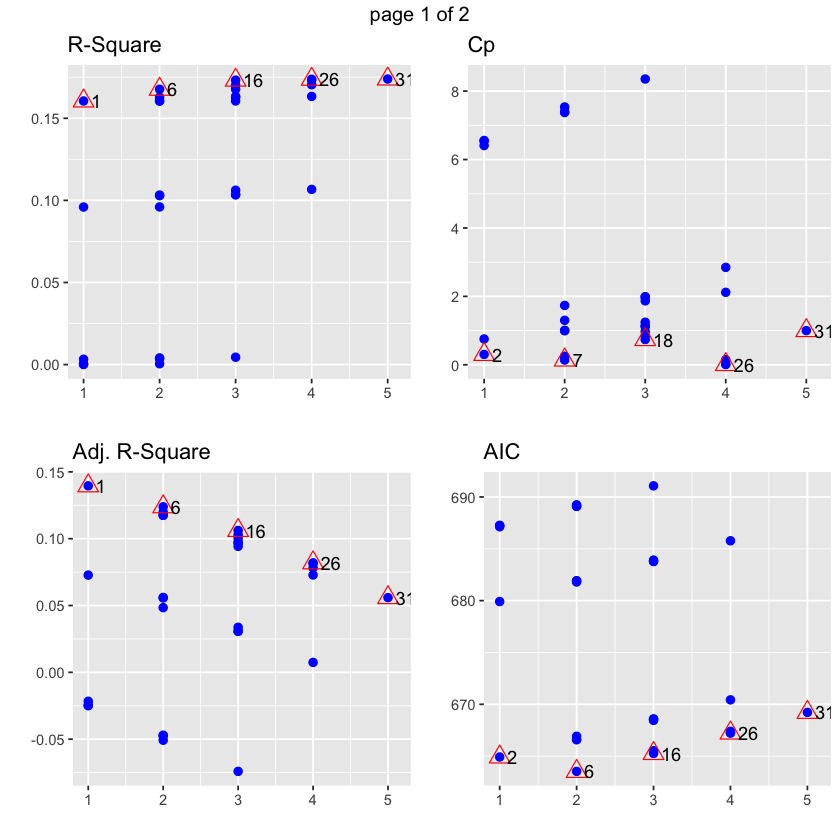

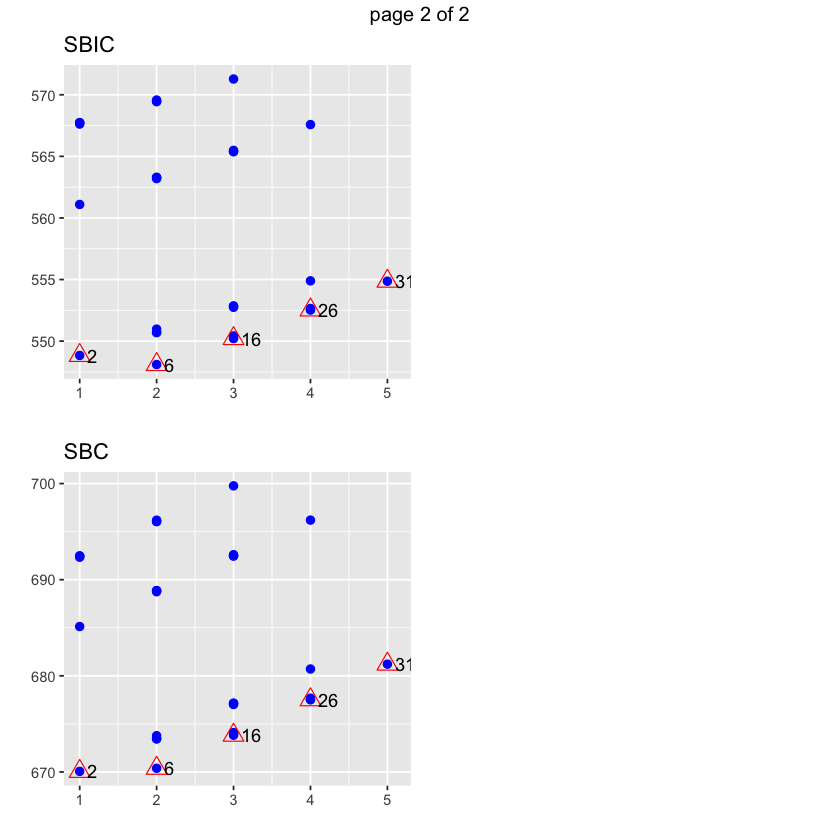

In [74]:
plot(all_possible)

In [387]:
write.csv(all_possible,'./All Possible.csv')

#### Model 21.5

In [75]:
selection_21.5 <- selection_21
for (col in colnames(selection_21.5)[3:length(selection_21.5)]) {
    selection_21.5[paste0(col,'_log')] <- log10(selection_21.5[col] + 1)
    selection_21.5[paste0(col,'_dim')] <- sqrt(selection_21.5[col])
}

In [76]:
colnames(selection_21.5)[1] <- 'Sales'

In [79]:
model_21.5 <- lm(formula=Sales ~ . , data = selection_21.5)

In [80]:
summary(model_21.5)


Call:
lm(formula = Sales ~ ., data = selection_21.5)

Residuals:
     Min       1Q   Median       3Q      Max 
-1167.79  -281.53     4.23   306.80  1024.97 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)
(Intercept)            -4.104e+04  3.859e+04  -1.063    0.297
lag_sales              -1.526e-01  1.668e-01  -0.915    0.368
Catalogs_ExistCust      8.985e+00  5.564e+00   1.615    0.118
Search                  3.566e+02  3.841e+02   0.928    0.361
Newsletter             -2.798e+02  5.328e+02  -0.525    0.604
other_offline          -1.604e+00  2.156e+00  -0.744    0.463
Catalogs_ExistCust_log  1.604e+03  2.002e+03   0.801    0.430
Catalogs_ExistCust_dim -4.716e+02  3.580e+02  -1.318    0.199
Search_log              7.314e+04  6.626e+04   1.104    0.279
Search_dim             -1.338e+04  1.331e+04  -1.005    0.324
Newsletter_log         -1.243e+04  3.099e+04  -0.401    0.692
Newsletter_dim          4.937e+03  1.068e+04   0.462    0.648
other_offline_log    

In [81]:
all_possible_21.5 <- ols_step_all_possible(model_21.5)

[[1]]
NULL

[[2]]
NULL


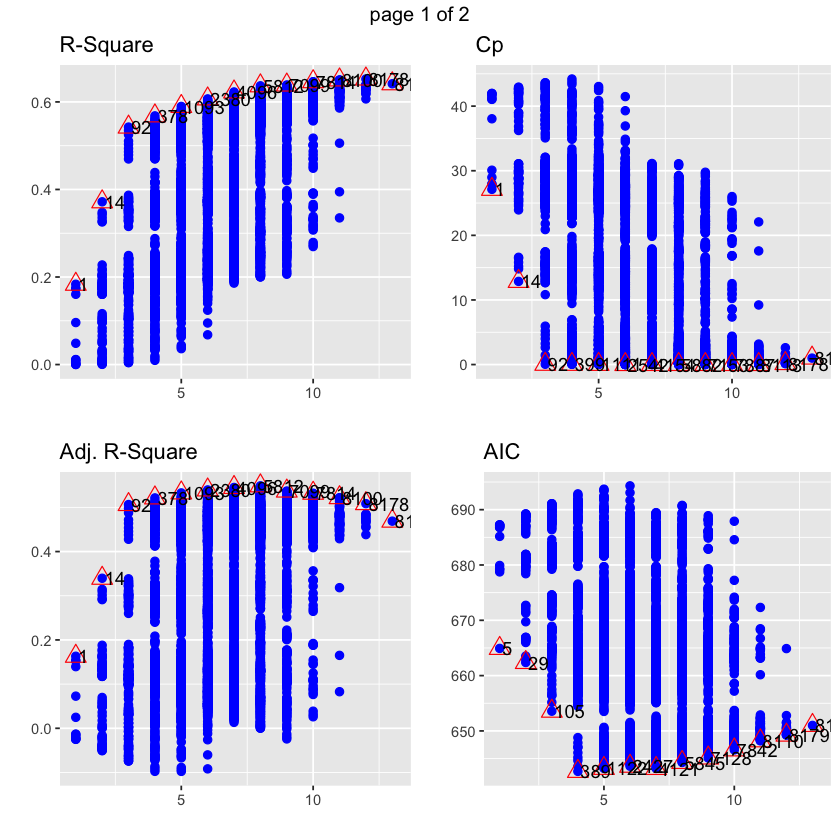

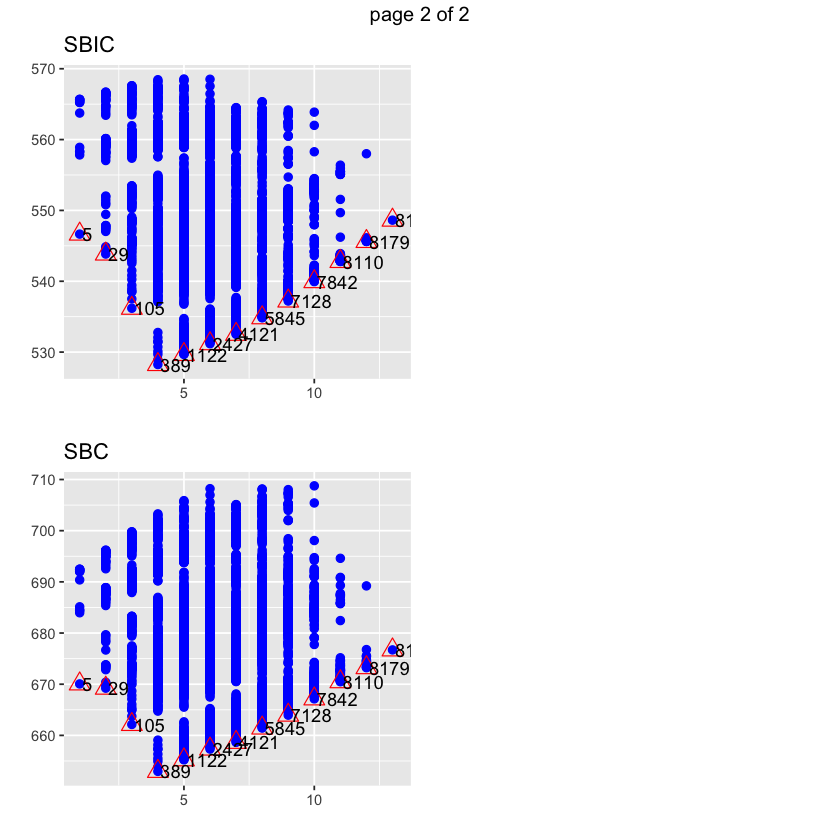

In [82]:
plot(all_possible_21.5)

In [83]:
write.csv(all_possible_21.5,'./All Possible 21.5.csv')

In [84]:
model_21.6 <- lm(formula=Sales ~ lag_sales + 
                 Catalogs_ExistCust + Search +
                 other_offline+  Catalogs_ExistCust_dim + 
                 Search_dim , data = selection_21.5)

In [86]:
summary(model_21.6)


Call:
lm(formula = Sales ~ lag_sales + Catalogs_ExistCust + Search + 
    other_offline + Catalogs_ExistCust_dim + Search_dim, data = selection_21.5)

Residuals:
     Min       1Q   Median       3Q      Max 
-1286.36  -409.95    63.21   388.44  1034.60 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)            1559.0215  2950.6727   0.528    0.601    
lag_sales                -0.1923     0.1500  -1.282    0.208    
Catalogs_ExistCust        4.8773     0.9267   5.263 7.83e-06 ***
Search                  -55.3646    43.8362  -1.263    0.215    
other_offline             0.1894     0.2192   0.864    0.394    
Catalogs_ExistCust_dim -198.1903    36.2614  -5.466 4.27e-06 ***
Search_dim             1176.2666   743.8264   1.581    0.123    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 567.6 on 34 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.5677,	Adjusted R-s

In [90]:
summary(lm(formula=Sales ~ lag_sales+  Catalogs_ExistCust+  other_offline + 
           Catalogs_ExistCust_dim+  Search_dim, data = selection_21.5))


Call:
lm(formula = Sales ~ lag_sales + Catalogs_ExistCust + other_offline + 
    Catalogs_ExistCust_dim + Search_dim, data = selection_21.5)

Residuals:
     Min       1Q   Median       3Q      Max 
-1371.27  -353.32    66.25   392.98  1012.74 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)            5118.6442   880.9031   5.811 1.37e-06 ***
lag_sales                -0.1442     0.1463  -0.986  0.33107    
Catalogs_ExistCust        4.8289     0.9338   5.171 9.55e-06 ***
other_offline             0.2098     0.2205   0.951  0.34799    
Catalogs_ExistCust_dim -195.6364    36.5115  -5.358 5.42e-06 ***
Search_dim              240.8240    69.1599   3.482  0.00135 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 572.4 on 35 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.5474,	Adjusted R-squared:  0.4828 
F-statistic: 8.467 on 5 and 35 DF,  p-value: 2.494e-05


#### Model 22

In [23]:
selection_22 <- selection_2

ERROR: Error in eval(expr, envir, enclos): object 'selection_2' not found


In [24]:
for (col in colnames(selection_22)[2:(length(selection_22) - 1)]) {
#     selection_15[paste0(col,'_log')] <- log10(selection_15[col] + 1)
    selection_22[paste0(col,'_dim')] <- sqrt(selection_22[col])
}

ERROR: Error in colnames(selection_22): object 'selection_22' not found


In [392]:
colnames(selection_22)[1] <- 'Sales'

In [393]:
model_22 <- lm(formula=Sales ~ . , data = selection_22)

In [394]:
summary(model_22)


Call:
lm(formula = Sales ~ ., data = selection_22)

Residuals:
    Min      1Q  Median      3Q     Max 
-819.44 -247.37   22.01  326.85  598.63 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)   
(Intercept)            -4.914e+03  5.508e+03  -0.892  0.38239   
Catalogs_ExistCust      3.570e+00  1.110e+00   3.216  0.00415 **
Catalogs_Winback       -9.284e+00  3.638e+00  -2.552  0.01855 * 
Catalogs_NewCust        5.313e-01  1.411e+00   0.376  0.71037   
Mailings                1.508e+01  2.145e+01   0.703  0.48976   
Banner                  3.149e+01  2.950e+01   1.068  0.29778   
Search                 -4.374e+01  6.918e+01  -0.632  0.53399   
Newsletter             -1.097e+02  7.828e+01  -1.401  0.17589   
Retargeting            -5.215e+00  2.544e+01  -0.205  0.83956   
Portals                -7.325e+02  7.765e+02  -0.943  0.35622   
lag_sales              -8.876e-02  2.264e-01  -0.392  0.69898   
Catalogs_ExistCust_dim -1.489e+02  4.074e+01  -3.654  0.001

In [395]:
AIC(model_22)

[1] 645.4961

In [396]:
all_possible_22 <- ols_step_all_possible(model_22)

In [397]:
all_possible_22

ERROR: Error in eval(expr, envir, enclos): object 'all_possible_22' not found


#### Model 23

In [220]:
selection_23 <- selection

In [224]:
for (col in colnames(selection_23)[3:length(selection_23)]) {
#     selection_23[paste0(col,'_log')] <- log10(selection_23[col] + 1)
    selection_23[paste0(col,'_dim')] <- sqrt(selection_23[col])
}

In [225]:
colnames(selection_23)[1] <- 'Sales'

In [226]:
head(selection_23)

Sales,lag_sales,Portals,Newsletter,Search,Catalogs_ExistCust,Portals_dim,Newsletter_dim,Search_dim,Catalogs_ExistCust_dim
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3444.523,NA,3.392569,26.886107,39.86268,503.9151,1.841893,5.185181,6.313690,22.44805
3354.753,3444.523,3.392569,8.854604,38.16640,306.3622,1.841893,2.975669,6.177896,17.50321
3979.682,3354.753,3.392569,34.146204,38.16640,1298.6937,1.841893,5.843475,6.177896,36.03739
4816.464,3979.682,3.392569,18.404685,38.16640,323.9706,1.841893,4.290068,6.177896,17.99918
4294.312,4816.464,3.392569,8.854604,38.16640,620.8101,1.841893,2.975669,6.177896,24.91606
4133.617,4294.312,3.392569,27.903877,38.16640,617.5646,1.841893,5.282412,6.177896,24.85085


In [180]:
a_selection_23 <- as.matrix(selection_23[,2:length(selection_23)])

In [181]:
b_selection_23 <- selection_23$Sales

In [182]:
a_selection_23[1,1]<- 0

In [183]:
nnls(a_selection_23, b_selection_23)$x

[1]    0.2945569    0.0000000    0.0000000    0.0000000    0.1034201
[6] 1023.2250259  229.8973240    0.0000000    0.0000000

Sales,lag_sales,Portals,Newsletter,Search,Catalogs_ExistCust,Portals_dim,Newsletter_dim,Search_dim,Catalogs_ExistCust_dim
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3444.523,NA,3.392569,26.886107,39.86268,503.9151,1.841893,5.185181,6.313690,22.44805
3354.753,3444.523,3.392569,8.854604,38.16640,306.3622,1.841893,2.975669,6.177896,17.50321
3979.682,3354.753,3.392569,34.146204,38.16640,1298.6937,1.841893,5.843475,6.177896,36.03739
4816.464,3979.682,3.392569,18.404685,38.16640,323.9706,1.841893,4.290068,6.177896,17.99918
4294.312,4816.464,3.392569,8.854604,38.16640,620.8101,1.841893,2.975669,6.177896,24.91606
4133.617,4294.312,3.392569,27.903877,38.16640,617.5646,1.841893,5.282412,6.177896,24.85085


In [207]:
summary(lm(formula=Sales ~ lag_sales + 
      Portals_dim + Newsletter_dim , data = selection_23))


Call:
lm(formula = Sales ~ lag_sales + Portals_dim + Newsletter_dim, 
    data = selection_23)

Residuals:
     Min       1Q   Median       3Q      Max 
-1283.87  -464.72    98.16   327.27  1599.87 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)  
(Intercept)    2260.5550   912.5889   2.477   0.0179 *
lag_sales         0.1302     0.1531   0.850   0.4007  
Portals_dim     765.4441   302.6454   2.529   0.0158 *
Newsletter_dim   50.4016   128.1084   0.393   0.6963  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 720.6 on 37 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.2416,	Adjusted R-squared:  0.1801 
F-statistic: 3.928 on 3 and 37 DF,  p-value: 0.01571


In [227]:
model_23 <- lm(formula=Sales ~ . , data = selection_23)

In [228]:
summary(model_23)


Call:
lm(formula = Sales ~ ., data = selection_23)

Residuals:
     Min       1Q   Median       3Q      Max 
-1276.60  -372.04    63.36   326.70  1066.45 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)            -587.8529  4154.4652  -0.141 0.888391    
lag_sales                -0.2096     0.1504  -1.394 0.173243    
Portals                 -86.0791   743.4005  -0.116 0.908565    
Newsletter              -77.9807    67.7805  -1.150 0.258741    
Search                  -58.6749    48.9150  -1.200 0.239410    
Catalogs_ExistCust        4.3963     0.9866   4.456 0.000101 ***
Portals_dim            1204.5596  3520.0307   0.342 0.734509    
Newsletter_dim          722.9787   647.8154   1.116 0.272987    
Search_dim             1009.1899   840.3718   1.201 0.238891    
Catalogs_ExistCust_dim -184.4188    37.2332  -4.953 2.46e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 567.4 on 31 degrees o

In [246]:
summary(lm(formula=Sales ~ lag_sales +  Portals_dim  + Newsletter_dim + Catalogs_ExistCust_dim +
           Search_dim, data = selection_23))


Call:
lm(formula = Sales ~ lag_sales + Portals_dim + Newsletter_dim + 
    Catalogs_ExistCust_dim + Search_dim, data = selection_23)

Residuals:
     Min       1Q   Median       3Q      Max 
-1165.04  -459.70   -23.17   370.44  1783.72 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)   
(Intercept)             3.108e+03  1.018e+03   3.052  0.00432 **
lag_sales               3.037e-03  1.730e-01   0.018  0.98609   
Portals_dim             1.167e+03  5.895e+02   1.981  0.05554 . 
Newsletter_dim          1.195e+02  1.343e+02   0.889  0.37983   
Catalogs_ExistCust_dim -2.785e+01  1.684e+01  -1.654  0.10699   
Search_dim             -9.988e+01  1.645e+02  -0.607  0.54758   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 709.8 on 35 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.3039,	Adjusted R-squared:  0.2045 
F-statistic: 3.056 on 5 and 35 DF,  p-value: 0.02159


In [229]:
stepAIC(model_23, direction = 'both', trace = FALSE)


Call:
lm(formula = Sales ~ lag_sales + Search + Catalogs_ExistCust + 
    Portals_dim + Search_dim + Catalogs_ExistCust_dim, data = selection_23)

Coefficients:
           (Intercept)               lag_sales                  Search  
             1270.1493                 -0.2336                -60.3744  
    Catalogs_ExistCust             Portals_dim              Search_dim  
                4.3878                749.4181               1077.5740  
Catalogs_ExistCust_dim  
             -184.3441  


In [230]:
fin_23 <- lm(formula = Sales ~ lag_sales + Search + Catalogs_ExistCust + 
    Portals_dim + Search_dim + Catalogs_ExistCust_dim, data = selection_23)

In [231]:
summary(fin_23)


Call:
lm(formula = Sales ~ lag_sales + Search + Catalogs_ExistCust + 
    Portals_dim + Search_dim + Catalogs_ExistCust_dim, data = selection_23)

Residuals:
     Min       1Q   Median       3Q      Max 
-1295.19  -411.43    92.69   285.16  1055.60 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)            1270.1493  2880.6765   0.441    0.662    
lag_sales                -0.2336     0.1451  -1.610    0.117    
Search                  -60.3744    42.6442  -1.416    0.166    
Catalogs_ExistCust        4.3878     0.9048   4.850 2.69e-05 ***
Portals_dim             749.4181   468.6409   1.599    0.119    
Search_dim             1077.5740   728.9440   1.478    0.149    
Catalogs_ExistCust_dim -184.3441    35.4100  -5.206 9.28e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 553.3 on 34 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.5891,	Adjusted R-squar

In [233]:
a_23 <- as.matrix(selection_23[,2:length(selection_23)])

In [234]:
a_23[1,1] <- 0

In [237]:
head(selection_23)

Sales,lag_sales,Portals,Newsletter,Search,Catalogs_ExistCust,Portals_dim,Newsletter_dim,Search_dim,Catalogs_ExistCust_dim
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3444.523,NA,3.392569,26.886107,39.86268,503.9151,1.841893,5.185181,6.313690,22.44805
3354.753,3444.523,3.392569,8.854604,38.16640,306.3622,1.841893,2.975669,6.177896,17.50321
3979.682,3354.753,3.392569,34.146204,38.16640,1298.6937,1.841893,5.843475,6.177896,36.03739
4816.464,3979.682,3.392569,18.404685,38.16640,323.9706,1.841893,4.290068,6.177896,17.99918
4294.312,4816.464,3.392569,8.854604,38.16640,620.8101,1.841893,2.975669,6.177896,24.91606
4133.617,4294.312,3.392569,27.903877,38.16640,617.5646,1.841893,5.282412,6.177896,24.85085


In [236]:
nnls(a_23, selection_23$Sales)$x

[1]    0.2945569    0.0000000    0.0000000    0.0000000    0.1034201
[6] 1023.2250259  229.8973240    0.0000000    0.0000000

In [245]:
summary(lm(formula = Sales ~ lag_sales  + Portals_dim  + Catalogs_ExistCust_dim
           + Newsletter_dim, data = selection_23))


Call:
lm(formula = Sales ~ lag_sales + Portals_dim + Catalogs_ExistCust_dim + 
    Newsletter_dim, data = selection_23)

Residuals:
     Min       1Q   Median       3Q      Max 
-1091.83  -503.69   -29.29   342.68  1802.88 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)   
(Intercept)             3.005e+03  9.953e+02   3.019  0.00464 **
lag_sales              -7.634e-03  1.706e-01  -0.045  0.96455   
Portals_dim             8.606e+02  3.009e+02   2.860  0.00700 **
Catalogs_ExistCust_dim -2.800e+01  1.669e+01  -1.678  0.10204   
Newsletter_dim          1.253e+02  1.328e+02   0.943  0.35175   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 703.6 on 36 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.2966,	Adjusted R-squared:  0.2184 
F-statistic: 3.795 on 4 and 36 DF,  p-value: 0.01127


In [214]:
summary(lm(formula = Sales ~ lag_sales + Search + Catalogs_ExistCust + 
    Portals_log + Search_log + Catalogs_ExistCust_log, data = selection_23))


Call:
lm(formula = Sales ~ lag_sales + Search + Catalogs_ExistCust + 
    Portals_log + Search_log + Catalogs_ExistCust_log, data = selection_23)

Residuals:
    Min      1Q  Median      3Q     Max 
-1169.4  -397.3    62.1   321.6  1151.1 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)            -1846.0014  4957.2544  -0.372  0.71192    
lag_sales                 -0.2675     0.1507  -1.775  0.08486 .  
Search                   -31.1777    22.6091  -1.379  0.17690    
Catalogs_ExistCust         1.5018     0.4361   3.444  0.00154 ** 
Portals_log             2830.3380  1481.7093   1.910  0.06457 .  
Search_log              5290.2848  3683.7855   1.436  0.16011    
Catalogs_ExistCust_log -1000.1038   197.1681  -5.072 1.38e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 561.5 on 34 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.5769,	Adjusted R-squared

In [16]:
all_possible_23 <- ols_step_all_possible(model_23)

In [31]:
write.csv(all_possible_23,'./All Possible 23.csv')

[[1]]
NULL

[[2]]
NULL


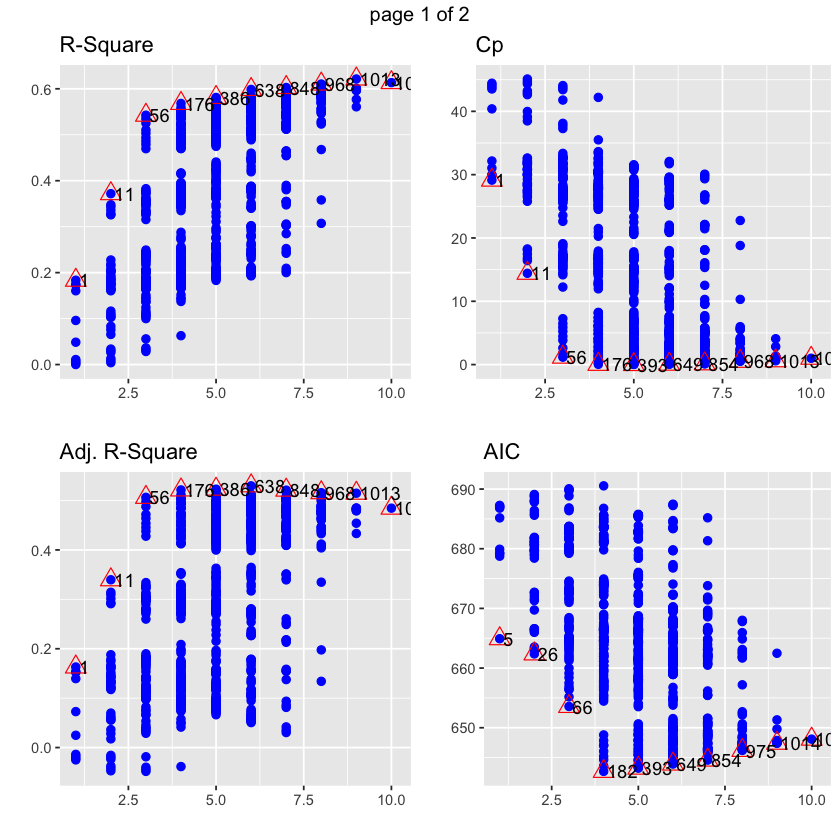

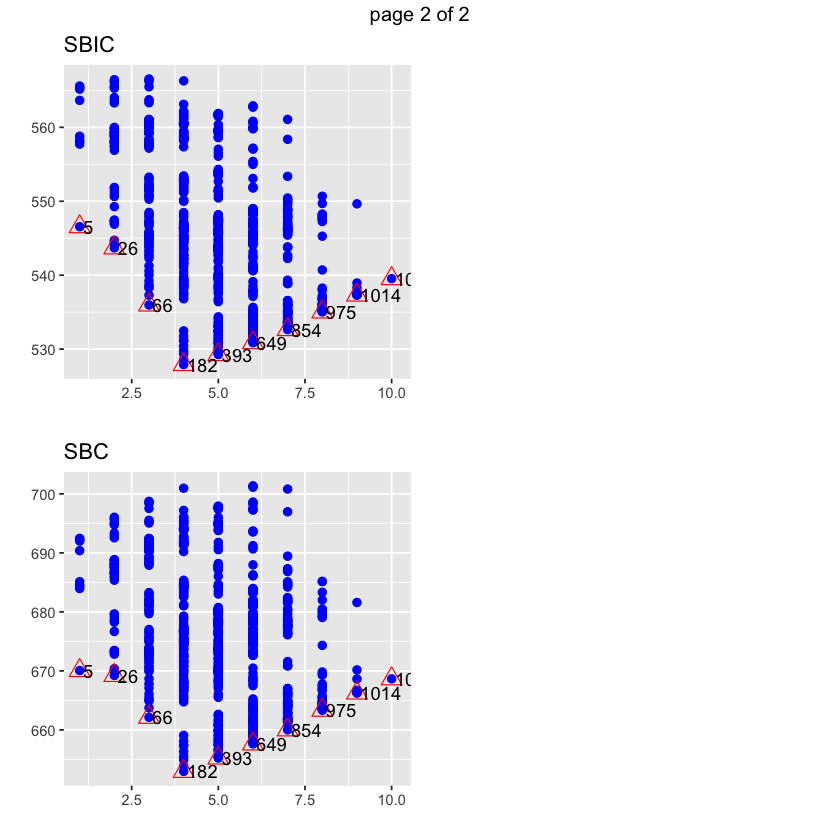

In [45]:
plot(all_possible_23)

In [429]:
ols_step_best_subset(model_23)

,mindex,n,predictors,rsquare,adjr,predrsq,cp,aic,sbic,sbc,msep,fpe,apc,hsp
,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
7,1,1,Search_log,0.1834730,0.1630598,0.1021508,30.135840,678.7493,557.7299,683.9623,583968.4,582610.4,0.8981797,14259.694
40,2,2,Catalogs_ExistCust Catalogs_ExistCust_dim,0.3718005,0.3395851,0.1980848,16.420680,669.7368,549.2742,676.6875,472925.6,470176.0,0.7248456,11548.182
152,3,3,Catalogs_ExistCust Search_log Catalogs_ExistCust_dim,0.5425416,0.5064265,0.3895914,4.173031,658.4156,540.0067,667.1039,363002.5,359203.7,0.5537654,8864.016
369,4,4,Catalogs_ExistCust Search_log Catalogs_ExistCust_log Catalogs_ExistCust_dim,0.5681121,0.5214216,0.3400076,4.039276,657.9998,540.4082,668.4258,361751.4,355862.4,0.5486143,8833.464
631,5,5,Catalogs_ExistCust Search_log Search_dim Catalogs_ExistCust_log Catalogs_ExistCust_dim,0.5811631,0.5229913,0.3142848,4.950227,658.7110,541.8593,670.8747,370866.7,362241.9,0.5584492,9056.047
834,6,6,Search Catalogs_ExistCust Search_log Search_dim Catalogs_ExistCust_log Catalogs_ExistCust_dim,0.5985444,0.5297235,0.3303050,5.499826,658.9309,543.1636,672.8322,376386.4,364569.6,0.5620378,9190.831
946,7,7,Newsletter Search Catalogs_ExistCust Search_log Search_dim Catalogs_ExistCust_log Catalogs_ExistCust_dim,0.6028045,0.5210290,0.2932754,7.144339,660.4828,545.4241,676.1218,394961.6,378887.6,0.5841110,9644.411
1009,8,8,Newsletter Search Catalogs_ExistCust Newsletter_dim Search_log Search_dim Catalogs_ExistCust_log Catalogs_ExistCust_dim,0.6102977,0.5158244,0.2745305,8.519067,661.6829,547.5699,679.0596,411730.0,390664.7,0.6022673,10053.872
1022,9,9,Newsletter Search Catalogs_ExistCust Newsletter_log Newsletter_dim Search_log Search_dim Catalogs_ExistCust_log Catalogs_ExistCust_dim,0.6212966,0.5147862,0.2938371,9.601254,662.4804,549.6543,681.5948,425922.9,399178.9,0.6153931,10400.443


#### Model 854

In [411]:
model_24 <- lm(formula = Sales~ (lag_sales +
                                 Search + 
                                 Catalogs_ExistCust + 
                                 Search_log + 
                                 Search_dim + 
                                 Catalogs_ExistCust_log +
                                 Catalogs_ExistCust_dim),  data=selection_23)

In [412]:
summary(model_24)


Call:
lm(formula = Sales ~ (lag_sales + Search + Catalogs_ExistCust + 
    Search_log + Search_dim + Catalogs_ExistCust_log + Catalogs_ExistCust_dim), 
    data = selection_23)

Residuals:
     Min       1Q   Median       3Q      Max 
-1358.24  -285.03     6.16   389.97  1079.56 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)  
(Intercept)            -4.268e+04  3.655e+04  -1.168   0.2514  
lag_sales              -1.541e-01  1.541e-01  -1.000   0.3247  
Search                  3.854e+02  3.687e+02   1.045   0.3035  
Catalogs_ExistCust      9.504e+00  3.829e+00   2.482   0.0183 *
Search_log              7.650e+04  6.339e+04   1.207   0.2361  
Search_dim             -1.418e+04  1.276e+04  -1.111   0.2745  
Catalogs_ExistCust_log  1.727e+03  1.354e+03   1.275   0.2111  
Catalogs_ExistCust_dim -5.043e+02  2.448e+02  -2.060   0.0473 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 561.6 on 33 degrees of freedom
  (

In [413]:
AIC(model_24)

[1] 644.5788

#### Model 649

In [415]:
model_649 <- lm(formula = Sales~ (lag_sales + 
                                 Catalogs_ExistCust +
                                 Search_log + 
                                 Search_dim + 
                                 Catalogs_ExistCust_log + 
                                 Catalogs_ExistCust_dim),  data=selection_23)

In [416]:
summary(model_649)


Call:
lm(formula = Sales ~ (lag_sales + Catalogs_ExistCust + Search_log + 
    Search_dim + Catalogs_ExistCust_log + Catalogs_ExistCust_dim), 
    data = selection_23)

Residuals:
     Min       1Q   Median       3Q      Max 
-1421.00  -393.49    91.84   396.22  1039.62 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)  
(Intercept)            -5198.0325  7109.9755  -0.731   0.4697  
lag_sales                 -0.1681     0.1537  -1.094   0.2818  
Catalogs_ExistCust         8.5154     3.7157   2.292   0.0282 *
Search_log             10700.3139  7453.2993   1.436   0.1602  
Search_dim              -866.0643   773.1332  -1.120   0.2705  
Catalogs_ExistCust_log  1384.8351  1315.7329   1.053   0.3000  
Catalogs_ExistCust_dim  -441.2768   237.5542  -1.858   0.0719 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 562.4 on 34 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.5756,	Ad

#### Model 182

In [418]:
model_182 <- lm(formula = Sales~ (lag_sales +
                                  Catalogs_ExistCust +
                                  Search_log +
                                  Catalogs_ExistCust_dim),  data=selection_23)

In [419]:
summary(model_182)


Call:
lm(formula = Sales ~ (lag_sales + Catalogs_ExistCust + Search_log + 
    Catalogs_ExistCust_dim), data = selection_23)

Residuals:
     Min       1Q   Median       3Q      Max 
-1372.61  -378.86    38.64   326.51  1112.89 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)            2991.0458  1135.1715   2.635 0.012334 *  
lag_sales                -0.1824     0.1445  -1.262 0.214895    
Catalogs_ExistCust        4.6691     0.9009   5.183 8.59e-06 ***
Search_log             2400.4944   658.4643   3.646 0.000836 ***
Catalogs_ExistCust_dim -191.8657    35.6672  -5.379 4.69e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 565.3 on 36 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.5459,	Adjusted R-squared:  0.4955 
F-statistic: 10.82 on 4 and 36 DF,  p-value: 7.296e-06


#### Model 393

In [420]:
model_393 <- lm(formula = Sales~ (lag_sales + 
                                  Catalogs_ExistCust + 
                                  Search_log + 
                                  Search_dim + 
                                  Catalogs_ExistCust_dim),  data=selection_23)
summary(model_393)


Call:
lm(formula = Sales ~ (lag_sales + Catalogs_ExistCust + Search_log + 
    Search_dim + Catalogs_ExistCust_dim), data = selection_23)

Residuals:
     Min       1Q   Median       3Q      Max 
-1286.67  -430.45    24.45   385.53  1143.32 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)            -4913.5934  7115.7705  -0.691    0.494    
lag_sales                 -0.2162     0.1470  -1.470    0.150    
Catalogs_ExistCust         4.7203     0.8988   5.252 7.48e-06 ***
Search_log             10766.7908  7464.5003   1.442    0.158    
Search_dim              -871.2238   774.3074  -1.125    0.268    
Catalogs_ExistCust_dim  -194.0594    35.5896  -5.453 4.07e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 563.2 on 35 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.5618,	Adjusted R-squared:  0.4992 
F-statistic: 8.973 on 5 and 35 DF,  p-value: 1.47e-05

#### Model 394

In [421]:
model_394 <- lm(formula = Sales~ (lag_sales + 
                                  Search + 
                                  Catalogs_ExistCust + 
                                  Search_log + 
                                  Catalogs_ExistCust_dim),  data=selection_23)
summary(model_394)


Call:
lm(formula = Sales ~ (lag_sales + Search + Catalogs_ExistCust + 
    Search_log + Catalogs_ExistCust_dim), data = selection_23)

Residuals:
     Min       1Q   Median       3Q      Max 
-1296.60  -434.99    34.88   372.30  1137.83 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)            -2215.5067  4977.9744  -0.445   0.6590    
lag_sales                 -0.2147     0.1473  -1.458   0.1537    
Search                   -24.0667    22.4064  -1.074   0.2901    
Catalogs_ExistCust         4.7148     0.9000   5.239 7.79e-06 ***
Search_log              6273.3985  3665.1115   1.712   0.0958 .  
Catalogs_ExistCust_dim  -193.8360    35.6386  -5.439 4.24e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 564.1 on 35 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.5604,	Adjusted R-squared:  0.4976 
F-statistic: 8.923 on 5 and 35 DF,  p-value: 1.547e-05


#### Model 395

In [422]:
model_395 <- lm(formula = Sales~ (lag_sales + 
                                  Catalogs_ExistCust + 
                                  Search_log + 
                                  Catalogs_ExistCust_log + 
                                  Catalogs_ExistCust_dim),  data=selection_23)
summary(model_395)


Call:
lm(formula = Sales ~ (lag_sales + Catalogs_ExistCust + Search_log + 
    Catalogs_ExistCust_log + Catalogs_ExistCust_dim), data = selection_23)

Residuals:
     Min       1Q   Median       3Q      Max 
-1507.33  -372.98    86.92   387.65  1008.68 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)            2657.5588  1176.5578   2.259 0.030234 *  
lag_sales                -0.1343     0.1513  -0.887 0.380909    
Catalogs_ExistCust        8.4900     3.7291   2.277 0.029029 *  
Search_log             2383.4498   657.6157   3.624 0.000911 ***
Catalogs_ExistCust_log 1394.1803  1320.4879   1.056 0.298290    
Catalogs_ExistCust_dim -440.7644   238.4171  -1.849 0.072962 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 564.4 on 35 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.5599,	Adjusted R-squared:  0.4971 
F-statistic: 8.906 on 5 and 35 DF,  p-value: 1.5

#### Model 399

In [18]:
colnames(selection_23)

[1] "Sales"                  "lag_sales"              "ADV_Offline"           
 [4] "Newsletter"             "Search"                 "Catalogs_ExistCust"    
 [7] "ADV_Offline_log"        "ADV_Offline_dim"        "Newsletter_log"        
[10] "Newsletter_dim"         "Search_log"             "Search_dim"            
[13] "Catalogs_ExistCust_log" "Catalogs_ExistCust_dim"

In [19]:
selection_399.1 <- selection_23 %>% select('Sales', 'lag_sales', 'Newsletter', 'Search',
                                           'Catalogs_ExistCust', 'Search_dim', 'Catalogs_ExistCust_dim')

In [20]:
model_399 <- lm(formula = Sales~ (lag_sales + 
                                  Search + 
                                  Catalogs_ExistCust + 
                                  Search_dim + 
                                  Catalogs_ExistCust_dim),  data=selection_23)
summary(model_399)


Call:
lm(formula = Sales ~ (lag_sales + Search + Catalogs_ExistCust + 
    Search_dim + Catalogs_ExistCust_dim), data = selection_23)

Residuals:
     Min       1Q   Median       3Q      Max 
-1310.14  -437.23    45.12   353.60  1131.57 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)            1522.0062  2939.6592   0.518    0.608    
lag_sales                -0.2124     0.1476  -1.439    0.159    
Search                  -58.1452    43.5593  -1.335    0.191    
Catalogs_ExistCust        4.7061     0.9020   5.217 8.31e-06 ***
Search_dim             1223.6891   739.1078   1.656    0.107    
Catalogs_ExistCust_dim -193.4651    35.7166  -5.417 4.54e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 565.5 on 35 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.5582,	Adjusted R-squared:  0.4951 
F-statistic: 8.844 on 5 and 35 DF,  p-value: 1.679e-05


In [21]:
model_399 <- lm(formula = Sales~ (lag_sales + 
                                  Search + 
                                  Catalogs_ExistCust + 
                                  Search_dim + 
                                  Catalogs_ExistCust_dim),  data=selection_23)
summary(model_399)


Call:
lm(formula = Sales ~ (lag_sales + Search + Catalogs_ExistCust + 
    Search_dim + Catalogs_ExistCust_dim), data = selection_23)

Residuals:
     Min       1Q   Median       3Q      Max 
-1310.14  -437.23    45.12   353.60  1131.57 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)            1522.0062  2939.6592   0.518    0.608    
lag_sales                -0.2124     0.1476  -1.439    0.159    
Search                  -58.1452    43.5593  -1.335    0.191    
Catalogs_ExistCust        4.7061     0.9020   5.217 8.31e-06 ***
Search_dim             1223.6891   739.1078   1.656    0.107    
Catalogs_ExistCust_dim -193.4651    35.7166  -5.417 4.54e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 565.5 on 35 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.5582,	Adjusted R-squared:  0.4951 
F-statistic: 8.844 on 5 and 35 DF,  p-value: 1.679e-05


In [51]:
head(selection_399.1)

Sales,lag_sales,Newsletter,Search,Catalogs_ExistCust,Search_dim,Catalogs_ExistCust_dim
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3444.523,NA,26.886107,39.86268,503.9151,6.313690,22.44805
3354.753,3444.523,8.854604,38.16640,306.3622,6.177896,17.50321
3979.682,3354.753,34.146204,38.16640,1298.6937,6.177896,36.03739
4816.464,3979.682,18.404685,38.16640,323.9706,6.177896,17.99918
4294.312,4816.464,8.854604,38.16640,620.8101,6.177896,24.91606
4133.617,4294.312,27.903877,38.16640,617.5646,6.177896,24.85085


In [49]:
model_399.1 <- lm(formula = Sales ~ . + Newsletter:Search + 
                  Newsletter:Catalogs_ExistCust + Search:Catalogs_ExistCust, data = selection_399.1)

In [50]:
summary(model_399.1)


Call:
lm(formula = Sales ~ . + Newsletter:Search + Newsletter:Catalogs_ExistCust + 
    Search:Catalogs_ExistCust, data = selection_399.1)

Residuals:
     Min       1Q   Median       3Q      Max 
-1125.23  -308.66    29.71   322.50  1156.15 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   3414.33895 2912.75099   1.172   0.2500    
lag_sales                       -0.24763    0.14201  -1.744   0.0911 .  
Newsletter                     -39.41958   60.87503  -0.648   0.5220    
Search                         -86.60508   45.51265  -1.903   0.0664 .  
Catalogs_ExistCust               4.55428    2.01914   2.256   0.0313 *  
Search_dim                    1216.20450  736.09728   1.652   0.1086    
Catalogs_ExistCust_dim        -217.07738   39.82665  -5.451  5.9e-06 ***
Newsletter:Search                0.88910    0.76839   1.157   0.2561    
Newsletter:Catalogs_ExistCust   -0.02488    0.04613  -0.539   0.5935    
Search:Cata

In [52]:
all_possible_399.1 <- ols_step_all_possible(model_399.1)

[[1]]
NULL

[[2]]
NULL


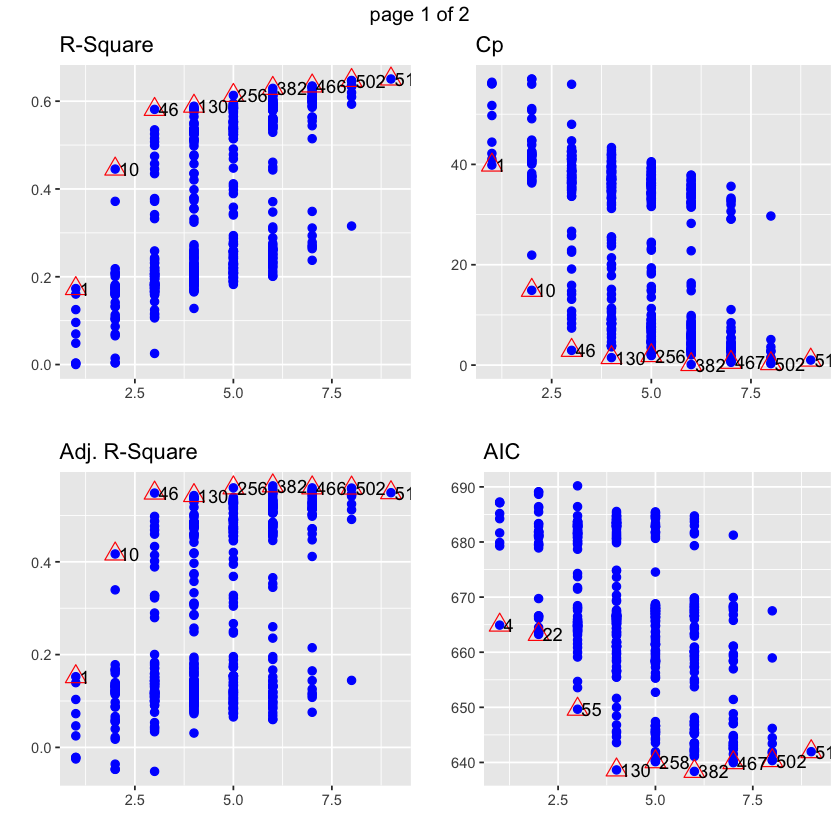

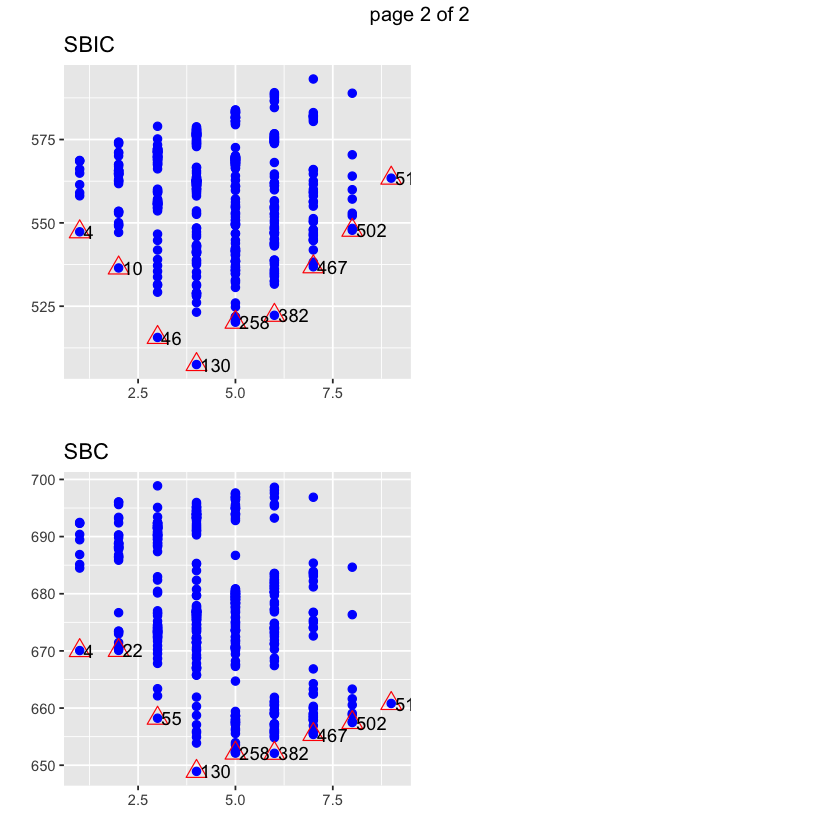

In [53]:
plot(all_possible_399.1)

In [58]:
all_possible_399.1[466,]

,mindex,n,predictors,rsquare,adjr,predrsq,cp,aic,sbic,sbc,msep,fpe,apc,hsp
,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
495,466,7,Newsletter Search Catalogs_ExistCust Search_dim Catalogs_ExistCust_dim Newsletter:Search Search:Catalogs_ExistCust,0.6346324,0.5594097,0.3968417,8.847614,656.9748,555.0202,672.6138,363312.7,348526.7,0.5373053,8871.589


In [56]:
summary(lm(formula = Sales ~ lag_sales + Search + 
           Catalogs_ExistCust + Search_dim + Catalogs_ExistCust_dim + 
           Search:Catalogs_ExistCust, data = selection_399.1))


Call:
lm(formula = Sales ~ lag_sales + Search + Catalogs_ExistCust + 
    Search_dim + Catalogs_ExistCust_dim + Search:Catalogs_ExistCust, 
    data = selection_399.1)

Residuals:
    Min      1Q  Median      3Q     Max 
-1069.8  -420.8   109.1   401.2  1180.4 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)               2627.99186 2766.57778   0.950   0.3489    
lag_sales                   -0.21875    0.13724  -1.594   0.1202    
Search                     -79.70550   41.36066  -1.927   0.0624 .  
Catalogs_ExistCust           2.94330    1.08640   2.709   0.0105 *  
Search_dim                1285.05116  687.42121   1.869   0.0702 .  
Catalogs_ExistCust_dim    -205.99596   33.55984  -6.138  5.7e-07 ***
Search:Catalogs_ExistCust    0.03054    0.01197   2.552   0.0154 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 525.6 on 34 degrees of freedom
  (1 observation deleted due to missingness)
M

In [62]:
summary(lm(formula = Sales ~ lag_sales  + Search +
           Catalogs_ExistCust + Search_dim + Catalogs_ExistCust_dim + Newsletter:Search + 
           Search:Catalogs_ExistCust, data = selection_399.1))


Call:
lm(formula = Sales ~ lag_sales + Search + Catalogs_ExistCust + 
    Search_dim + Catalogs_ExistCust_dim + Newsletter:Search + 
    Search:Catalogs_ExistCust, data = selection_399.1)

Residuals:
     Min       1Q   Median       3Q      Max 
-1060.72  -415.09    59.38   354.99  1187.68 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)               2995.01377 2863.81511   1.046   0.3032    
lag_sales                   -0.22294    0.13878  -1.606   0.1177    
Search                     -76.98662   42.02728  -1.832   0.0760 .  
Catalogs_ExistCust           2.84904    1.10894   2.569   0.0149 *  
Search_dim                1206.04999  707.28206   1.705   0.0976 .  
Catalogs_ExistCust_dim    -204.99158   33.93403  -6.041 8.55e-07 ***
Search:Newsletter            0.09712    0.16652   0.583   0.5637    
Search:Catalogs_ExistCust    0.03063    0.01209   2.534   0.0162 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Res

#### Model 651

In [60]:
model_651 <- lm(formula = Sales~ (lag_sales + 
                                  Search + 
                                  Catalogs_ExistCust + 
                                  Search_log + 
                                  Catalogs_ExistCust_log + 
                                  Catalogs_ExistCust_dim),  data=selection_23)
summary(model_651)


Call:
lm(formula = Sales ~ (lag_sales + Search + Catalogs_ExistCust + 
    Search_log + Catalogs_ExistCust_log + Catalogs_ExistCust_dim), 
    data = selection_23)

Residuals:
     Min       1Q   Median       3Q      Max 
-1430.02  -398.90    96.49   396.33  1035.32 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)  
(Intercept)            -2434.6091  4977.4733  -0.489   0.6279  
lag_sales                 -0.1670     0.1542  -1.083   0.2866  
Search                   -23.5708    22.3890  -1.053   0.2999  
Catalogs_ExistCust         8.4534     3.7235   2.270   0.0296 *
Search_log              6176.9199  3662.6116   1.686   0.1009  
Catalogs_ExistCust_log  1364.4612  1318.7508   1.035   0.3081  
Catalogs_ExistCust_dim  -437.3885   238.0705  -1.837   0.0749 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 563.5 on 34 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.5738,	Adjust

#### Model 654

In [427]:
model_654 <- lm(formula = Sales~ (lag_sales + 
                                  Search + 
                                  Catalogs_ExistCust + 
                                  Search_dim + 
                                  Catalogs_ExistCust_log + 
                                  Catalogs_ExistCust_dim + Catalogs_ExistCust:Search),  data=selection_23)
summary(model_654)


Call:
lm(formula = Sales ~ (lag_sales + Search + Catalogs_ExistCust + 
    Search_dim + Catalogs_ExistCust_log + Catalogs_ExistCust_dim + 
    Catalogs_ExistCust:Search), data = selection_23)

Residuals:
    Min      1Q  Median      3Q     Max 
-1170.3  -382.1   127.7   330.0  1131.6 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)  
(Intercept)               2398.57813 2754.93089   0.871   0.3902  
lag_sales                   -0.16656    0.14305  -1.164   0.2526  
Search                     -78.31531   41.10429  -1.905   0.0655 .
Catalogs_ExistCust           6.94744    3.49322   1.989   0.0551 .
Search_dim                1253.59015  683.39008   1.834   0.0756 .
Catalogs_ExistCust_log    1474.81093 1223.68220   1.205   0.2367  
Catalogs_ExistCust_dim    -469.45367  221.12418  -2.123   0.0413 *
Search:Catalogs_ExistCust    0.03116    0.01190   2.618   0.0132 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 52

In [46]:
model_186 <- lm(formula = Sales~ (lag_sales + 
                                  Catalogs_ExistCust + 
                                  Search_dim + 
                                  Catalogs_ExistCust_dim),  data=selection_23)
summary(model_186)


Call:
lm(formula = Sales ~ (lag_sales + Catalogs_ExistCust + Search_dim + 
    Catalogs_ExistCust_dim), data = selection_23)

Residuals:
     Min       1Q   Median       3Q      Max 
-1402.50  -394.58     5.32   340.63  1119.49 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)            5276.4715   863.9951   6.107 5.00e-07 ***
lag_sales                -0.1639     0.1446  -1.133  0.26456    
Catalogs_ExistCust        4.6357     0.9102   5.093 1.13e-05 ***
Search_dim              241.3147    69.0666   3.494  0.00128 ** 
Catalogs_ExistCust_dim -190.2330    36.0193  -5.281 6.34e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 571.6 on 36 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.5357,	Adjusted R-squared:  0.4841 
F-statistic: 10.38 on 4 and 36 DF,  p-value: 1.07e-05


#### Model with Portals

In [189]:
selection_34 <- selection

In [190]:
head(selection_34)

Sales (units),lag_sales,Portals,Newsletter,Search,Catalogs_ExistCust
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3444.523,NA,3.392569,26.886107,39.86268,503.9151
3354.753,3444.523,3.392569,8.854604,38.16640,306.3622
3979.682,3354.753,3.392569,34.146204,38.16640,1298.6937
4816.464,3979.682,3.392569,18.404685,38.16640,323.9706
4294.312,4816.464,3.392569,8.854604,38.16640,620.8101
4133.617,4294.312,3.392569,27.903877,38.16640,617.5646


In [191]:
for (col in colnames(selection_34)[3:length(selection_34)]) {
#     selection_34[paste0(col,'_log')] <- log10(selection_34[col] + 1)
    selection_34[paste0(col,'_dim')] <- sqrt(selection_34[col])
}
colnames(selection_34)[1] <- 'Sales'

In [195]:
model_34 <- lm(formula=Sales ~ . , data = selection_34)

In [196]:
summary(model_34)


Call:
lm(formula = Sales ~ ., data = selection_34)

Residuals:
     Min       1Q   Median       3Q      Max 
-1276.60  -372.04    63.36   326.70  1066.45 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)            -587.8529  4154.4652  -0.141 0.888391    
lag_sales                -0.2096     0.1504  -1.394 0.173243    
Portals                 -86.0791   743.4005  -0.116 0.908565    
Newsletter              -77.9807    67.7805  -1.150 0.258741    
Search                  -58.6749    48.9150  -1.200 0.239410    
Catalogs_ExistCust        4.3963     0.9866   4.456 0.000101 ***
Portals_dim            1204.5596  3520.0307   0.342 0.734509    
Newsletter_dim          722.9787   647.8154   1.116 0.272987    
Search_dim             1009.1899   840.3718   1.201 0.238891    
Catalogs_ExistCust_dim -184.4188    37.2332  -4.953 2.46e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 567.4 on 31 degrees o

In [197]:
all_possible_34 <- ols_step_all_possible(model_34)

In [202]:
all_possible_34[382,]

,mindex,n,predictors,rsquare,adjr,predrsq,cp,aic,sbic,sbc,msep,fpe,apc,hsp
,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
434,382,6,lag_sales Search Catalogs_ExistCust Portals_dim Search_dim Catalogs_ExistCust_dim,0.5891039,0.5165928,0.2607568,5.335912,642.5872,529.8418,656.2957,370682.1,358461.8,0.5800886,9278.367


[[1]]
NULL

[[2]]
NULL


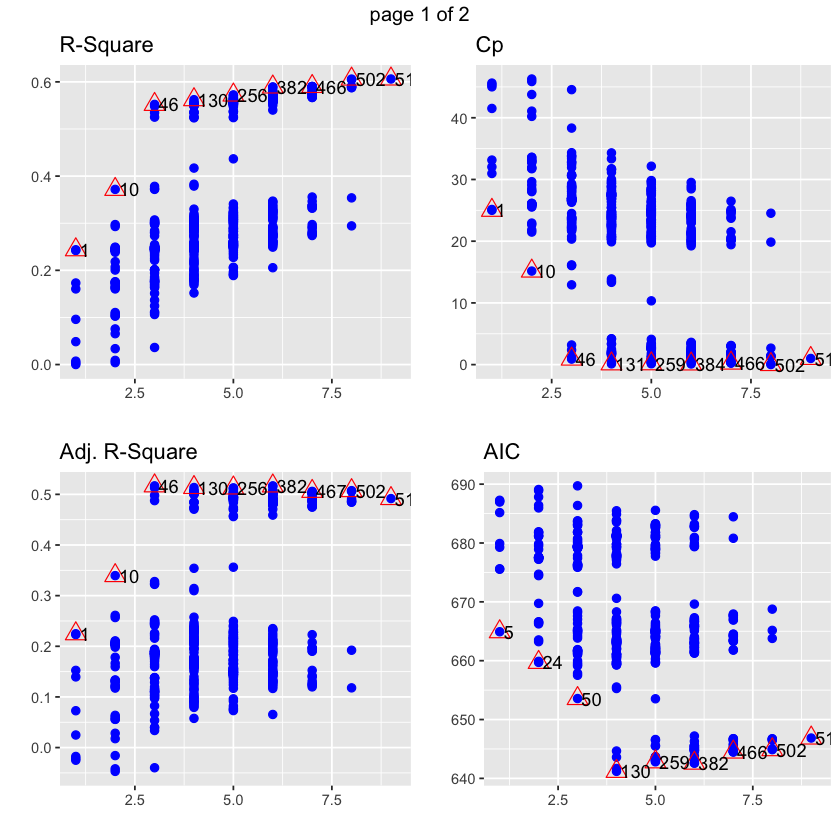

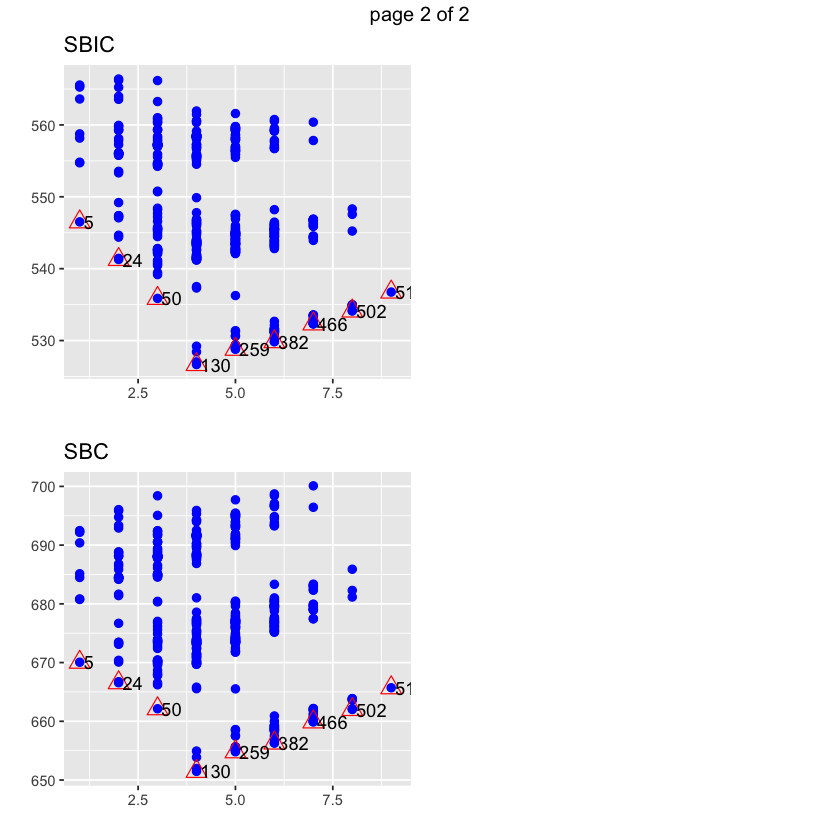

In [198]:
plot(all_possible_34)

In [80]:
write.csv(all_possible_34, './all_possible_34.csv')

In [109]:
stepAIC(model_34, direction = 'backward', trace = FALSE)


Call:
lm(formula = Sales ~ lag_sales + Search + Catalogs_ExistCust + 
    Portals_dim + Search_dim + Catalogs_ExistCust_dim, data = selection_34)

Coefficients:
           (Intercept)               lag_sales                  Search  
             1270.1493                 -0.2336                -60.3744  
    Catalogs_ExistCust             Portals_dim              Search_dim  
                4.3878                749.4181               1077.5740  
Catalogs_ExistCust_dim  
             -184.3441  


In [204]:
summary(lm(formula = Sales ~ lag_sales + Search +
           Catalogs_ExistCust + Portals_dim + Search_dim +
           Catalogs_ExistCust_dim, data = selection_34))


Call:
lm(formula = Sales ~ lag_sales + Search + Catalogs_ExistCust + 
    Portals_dim + Search_dim + Catalogs_ExistCust_dim, data = selection_34)

Residuals:
     Min       1Q   Median       3Q      Max 
-1295.19  -411.43    92.69   285.16  1055.60 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)            1270.1493  2880.6765   0.441    0.662    
lag_sales                -0.2336     0.1451  -1.610    0.117    
Search                  -60.3744    42.6442  -1.416    0.166    
Catalogs_ExistCust        4.3878     0.9048   4.850 2.69e-05 ***
Portals_dim             749.4181   468.6409   1.599    0.119    
Search_dim             1077.5740   728.9440   1.478    0.149    
Catalogs_ExistCust_dim -184.3441    35.4100  -5.206 9.28e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 553.3 on 34 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.5891,	Adjusted R-squar

In [113]:
summary(lm(formula = Sales ~ lag_sales + Search + Catalogs_ExistCust + 
    Portals_dim + Search_dim + Catalogs_ExistCust_dim, data = selection_34))


Call:
lm(formula = Sales ~ lag_sales + Search + Catalogs_ExistCust + 
    Portals_dim + Search_dim + Catalogs_ExistCust_dim, data = selection_34)

Residuals:
     Min       1Q   Median       3Q      Max 
-1295.19  -411.43    92.69   285.16  1055.60 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)            1270.1493  2880.6765   0.441    0.662    
lag_sales                -0.2336     0.1451  -1.610    0.117    
Search                  -60.3744    42.6442  -1.416    0.166    
Catalogs_ExistCust        4.3878     0.9048   4.850 2.69e-05 ***
Portals_dim             749.4181   468.6409   1.599    0.119    
Search_dim             1077.5740   728.9440   1.478    0.149    
Catalogs_ExistCust_dim -184.3441    35.4100  -5.206 9.28e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 553.3 on 34 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.5891,	Adjusted R-squar

In [116]:
summary(lm(formula = Sales ~ lag_sales + Newsletterx + 
    Portals_dim + Search_dim + Catalogs_ExistCust_dim, data = selection_34))


Call:
lm(formula = Sales ~ lag_sales + Newsletter + Portals_dim + Search_dim + 
    Catalogs_ExistCust_dim, data = selection_34)

Residuals:
     Min       1Q   Median       3Q      Max 
-1210.47  -457.00   -78.99   313.08  1788.13 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)   
(Intercept)             3.370e+03  9.704e+02   3.472  0.00139 **
lag_sales               4.174e-03  1.742e-01   0.024  0.98102   
Newsletter              9.819e+00  1.412e+01   0.696  0.49133   
Portals_dim             1.175e+03  5.928e+02   1.982  0.05538 . 
Search_dim             -9.762e+01  1.658e+02  -0.589  0.55969   
Catalogs_ExistCust_dim -2.666e+01  1.686e+01  -1.582  0.12270   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 712.9 on 35 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.2979,	Adjusted R-squared:  0.1976 
F-statistic:  2.97 on 5 and 35 DF,  p-value: 0.02449


In [131]:
summary(lm(formula = Sales ~ lag_sales  + Search + Catalogs_ExistCust + 
           Newsletter_dim + Search_dim , data = selection_34))


Call:
lm(formula = Sales ~ lag_sales + Search + Catalogs_ExistCust + 
    Newsletter_dim + Portals_dim, data = selection_34)

Residuals:
     Min       1Q   Median       3Q      Max 
-1176.01  -434.74    -9.86   402.45  1618.05 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)  
(Intercept)        1955.70918 1050.55302   1.862   0.0711 .
lag_sales             0.12543    0.16783   0.747   0.4598  
Search               -7.49718   10.05750  -0.745   0.4610  
Catalogs_ExistCust   -0.08497    0.45316  -0.188   0.8523  
Newsletter_dim       50.13676  141.82398   0.354   0.7258  
Portals_dim        1166.08229  614.27225   1.898   0.0659 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 735 on 35 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.2538,	Adjusted R-squared:  0.1472 
F-statistic: 2.381 on 5 and 35 DF,  p-value: 0.05839


### Key Recommendations

In [105]:
models <- data.frame(model_number=seq(1,20, 1))

In [106]:
for (mod in seq(1,20, 1)){
    temp_var <- get(paste0('model_', toString(mod)))
    models[mod, 'AIC'] <- AIC(temp_var)
    models[mod, 'No. of vars'] <- length(temp_var$coefficients) - 1
    models[mod, 'R-squared'] <- summary(temp_var)$r.squared
    models[mod, 'Adj R-squared'] <- summary(temp_var)$adj.r.squared
    models[mod, 'p-value'] <- pf(summary(temp_var)$fstatistic[1],summary(temp_var)$fstatistic[2],summary(temp_var)$fstatistic[3],lower.tail=F)
}

In [107]:
models

model_number,AIC,No. of vars,R-squared,Adj R-squared,p-value
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,664.9297,5,0.2559852,0.14969739,5.603159e-02
2,671.2056,10,0.3205874,0.09411647,2.210812e-01
3,646.8573,9,0.6060795,0.49171544,2.153671e-04
4,642.5872,6,0.5891039,0.51659279,1.739349e-05
5,646.8573,9,0.6060795,0.49171544,2.153671e-04
6,644.8751,8,0.6059091,0.50738637,8.196091e-05
7,642.5872,6,0.5891039,0.51659279,1.739349e-05
8,644.8751,8,0.6059091,0.50738637,8.196091e-05
9,640.3357,20,0.8035321,0.60706417,1.367850e-03


In [108]:
str(summary(model_1))

List of 11
 $ call         : language lm(formula = `Sales (units)` ~ . - 1 + 1, data = subset_selection)
 $ terms        :Classes 'terms', 'formula'  language `Sales (units)` ~ (lag_sales + Portals + Newsletter + Search + Catalogs_ExistCust) -      1 + 1
  .. ..- attr(*, "variables")= language list(`Sales (units)`, lag_sales, Portals, Newsletter, Search, Catalogs_ExistCust)
  .. ..- attr(*, "factors")= int [1:6, 1:5] 0 1 0 0 0 0 0 0 1 0 ...
  .. .. ..- attr(*, "dimnames")=List of 2
  .. .. .. ..$ : chr [1:6] "`Sales (units)`" "lag_sales" "Portals" "Newsletter" ...
  .. .. .. ..$ : chr [1:5] "lag_sales" "Portals" "Newsletter" "Search" ...
  .. ..- attr(*, "term.labels")= chr [1:5] "lag_sales" "Portals" "Newsletter" "Search" ...
  .. ..- attr(*, "order")= int [1:5] 1 1 1 1 1
  .. ..- attr(*, "intercept")= int 1
  .. ..- attr(*, "response")= int 1
  .. ..- attr(*, ".Environment")=<environment: R_GlobalEnv> 
  .. ..- attr(*, "predvars")= language list(`Sales (units)`, lag_sales, Portals, N

#### Variable Choices

The most optimum varia

### Part 6

In [140]:
library(lsei)

lag_sales,Portals,Newsletter,Search,Catalogs_ExistCust,Portals_dim,Newsletter_dim,Search_dim,Catalogs_ExistCust_dim
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
NA,3.392569,26.886107,39.86268,503.9151,1.841893,5.185181,6.313690,22.44805
3444.523,3.392569,8.854604,38.16640,306.3622,1.841893,2.975669,6.177896,17.50321
3354.753,3.392569,34.146204,38.16640,1298.6937,1.841893,5.843475,6.177896,36.03739
3979.682,3.392569,18.404685,38.16640,323.9706,1.841893,4.290068,6.177896,17.99918
4816.464,3.392569,8.854604,38.16640,620.8101,1.841893,2.975669,6.177896,24.91606
4294.312,3.392569,27.903877,38.16640,617.5646,1.841893,5.282412,6.177896,24.85085
4133.617,3.392569,8.854604,40.71082,304.3570,1.841893,2.975669,6.380503,17.44583
4821.475,3.392569,18.404685,41.55897,617.3280,1.841893,4.290068,6.446624,24.84609
3503.131,3.392569,18.353796,43.25525,556.2475,1.841893,4.284133,6.576872,23.58490


In [138]:
a <- as.matrix(selection_34[,2:10])

In [143]:
a[1,1] <- 0

In [144]:
b <- selection_34$Sales

In [148]:
nnls(a, b)$x

[1]    0.2945569    0.0000000    0.0000000    0.0000000    0.1034201
[6] 1023.2250259  229.8973240    0.0000000    0.0000000

In [150]:
head(a)

lag_sales,Portals,Newsletter,Search,Catalogs_ExistCust,Portals_dim,Newsletter_dim,Search_dim,Catalogs_ExistCust_dim
0.000,3.392569,26.886107,39.86268,503.9151,1.841893,5.185181,6.313690,22.44805
3444.523,3.392569,8.854604,38.16640,306.3622,1.841893,2.975669,6.177896,17.50321
3354.753,3.392569,34.146204,38.16640,1298.6937,1.841893,5.843475,6.177896,36.03739
3979.682,3.392569,18.404685,38.16640,323.9706,1.841893,4.290068,6.177896,17.99918
4816.464,3.392569,8.854604,38.16640,620.8101,1.841893,2.975669,6.177896,24.91606
4294.312,3.392569,27.903877,38.16640,617.5646,1.841893,5.282412,6.177896,24.85085


In [151]:
summary(lm(formula = Sales ~ lag_sales  + Catalogs_ExistCust + 
           Portals_dim + Newsletter_dim , data = selection_34))


Call:
lm(formula = Sales ~ lag_sales + Catalogs_ExistCust + Portals_dim + 
    Newsletter_dim, data = selection_34)

Residuals:
     Min       1Q   Median       3Q      Max 
-1269.35  -464.71    82.45   333.10  1625.82 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)  
(Intercept)        2286.85378  946.11465   2.417   0.0208 *
lag_sales             0.12212    0.16673   0.732   0.4687  
Catalogs_ExistCust   -0.05935    0.44906  -0.132   0.8956  
Portals_dim         771.87231  310.57778   2.485   0.0177 *
Newsletter_dim       57.53004  140.60095   0.409   0.6848  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 730.4 on 36 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.2419,	Adjusted R-squared:  0.1577 
F-statistic: 2.872 on 4 and 36 DF,  p-value: 0.0366
